# Data Management and Visualization (CDSCO2303E)

# Data Wrangling

### Load the dataset

In [1]:
#Supports reading, cleaning and processing of data:
import pandas as pd

#Supports visualization of data:
import matplotlib.pyplot as plt

#Supports visualization of data:
import seaborn as sns

import numpy as np

In [2]:
#Open csv file and read it:
listings_df = pd.read_csv('listings2024 (1).csv', encoding='UTF-8')

## Discovery

In [3]:
listings_df.shape

(20909, 75)

In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20909 non-null  int64  
 1   listing_url                                   20909 non-null  object 
 2   scrape_id                                     20909 non-null  int64  
 3   last_scraped                                  20909 non-null  object 
 4   source                                        20909 non-null  object 
 5   name                                          20909 non-null  object 
 6   description                                   20235 non-null  object 
 7   neighborhood_overview                         8984 non-null   object 
 8   picture_url                                   20909 non-null  object 
 9   host_id                                       20909 non-null 

From here we see three columns with 0 values: neighbourhood_group_cleansed, calendar_updated and license. As well as types of the columns which are incorrectly formatted. 

In [5]:
listings_df.head()

id                          listing_url       scrape_id last_scraped  \
0   31094   https://www.airbnb.com/rooms/31094  20240629155650   2024-06-30   
1  262961  https://www.airbnb.com/rooms/262961  20240629155650   2024-06-30   
2  263036  https://www.airbnb.com/rooms/263036  20240629155650   2024-06-30   
3   32379   https://www.airbnb.com/rooms/32379  20240629155650   2024-06-30   
4  263708  https://www.airbnb.com/rooms/263708  20240629155650   2024-06-30   

            source                                               name  \
0  previous scrape  Beautiful, spacious, central, renovated Penthouse   
1      city scrape    192m2 FLAT+ 8m2 BALCONY IN CENTER NØRREBRO HOOD   
2      city scrape                    Bright flat in central location   
3      city scrape  155 m2 artist flat on Vesterbro, with 2 bathrooms   
4      city scrape                  Urban garden on Vesterbro rooftop   

                                         description  \
0  Welcome to our home, we hope you will enjoy Wo...   
1  If you are looking for a large apartment in ce...   
2                                                NaN   
3  You enter a narrow entrance and feel the good ...   
4                                                NaN   

                               neighborhood_overview  \
0  What else is nearby?<br />To be honest, We thi...   
1  TIME OUT - The world’s coolest neighbourhoods ...   
2                                                NaN   
3  Værnedamsvej area is super hip area, we call i...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...   129976  ...   
1  https://a0.muscache.com/pictures/261aa506-7b13...  1379904  ...   
2  https://a0.muscache.com/pictures/17770169/f1fb...  1232471  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...   140105  ...   
4  https://a0.muscache.com/pictures/8ce36f40-ac59...  1383888  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.80                4.53   
1                        4.94                   4.89                4.53   
2                        4.86                   4.81                4.67   
3                        4.91                   4.89                4.71   
4                        5.00                   4.67                4.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              1   
2     NaN                f                              1   
3     NaN                f                              2   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.11  
1                                           0              0.24  
2                                           0              0.14  
3                                           0              0.49  
4                                           0              0.02  

[5 rows x 75 columns]

In [6]:
# Calculate total missing values
total_missing = listings_df.isnull().sum().sum()

# Display result
print(f"Total Missing Values in DataFrame: {(total_missing / listings_df.size)*100:.2f}%")

Total Missing Values in DataFrame: 12.14%


In [7]:
# Observe all the unique values for each column
unique_counts = pd.DataFrame.from_records([(col, listings_df[col].nunique()) for col in listings_df.columns],columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
49              calendar_updated           0
68                       license           0
29  neighbourhood_group_cleansed           0
2                      scrape_id           1
55         calendar_last_scraped           2
..                           ...         ...
39                     amenities       19644
6                    description       19655
8                    picture_url       20761
1                    listing_url       20909
0                             id       20909

[75 rows x 2 columns]

In [8]:
listings_df.describe()

id     scrape_id       host_id  host_listings_count  \
count  2.090900e+04  2.090900e+04  2.090900e+04         20908.000000   
mean   5.137813e+17  2.024063e+13  1.442690e+08             5.942606   
std    4.737075e+17  0.000000e+00  1.687214e+08            32.713862   
min    3.109400e+04  2.024063e+13  5.130000e+02             1.000000   
25%    3.140450e+07  2.024063e+13  1.739651e+07             1.000000   
50%    6.452861e+17  2.024063e+13  6.431141e+07             1.000000   
75%    9.441256e+17  2.024063e+13  2.097030e+08             1.000000   
max    1.189116e+18  2.024063e+13  5.862358e+08           667.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               20908.000000                           0.0  20909.000000   
mean                   12.671992                           NaN     55.680567   
std                    84.689161                           NaN      0.019127   
min                     1.000000                           NaN     55.615660   
25%                     1.000000                           NaN     55.666280   
50%                     1.000000                           NaN     55.681930   
75%                     2.000000                           NaN     55.696041   
max                  1972.000000                           NaN     55.732470   

          longitude  accommodates     bathrooms  ...  review_scores_checkin  \
count  20909.000000  20909.000000  13660.000000  ...           17665.000000   
mean      12.558550      3.336315      1.103990  ...               4.880881   
std        0.031304      1.644905      0.326999  ...               0.219335   
min       12.454000      1.000000      0.000000  ...               1.000000   
25%       12.540730      2.000000      1.000000  ...               4.830000   
50%       12.555170      3.000000      1.000000  ...               4.970000   
75%       12.580508      4.000000      1.000000  ...               5.000000   
max       12.639720     16.000000      8.000000  ...               5.000000   

       review_scores_communication  review_scores_location  \
count                 17665.000000            17664.000000   
mean                      4.917725                4.840928   
std                       0.191054                0.233053   
min                       1.000000                1.000000   
25%                       4.900000                4.760000   
50%                       5.000000                4.920000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  license  calculated_host_listings_count  \
count         17664.000000      0.0                    20909.000000   
mean              4.724537      NaN                        4.659572   
std               0.308463      NaN                       26.246421   
min               1.000000      NaN                        1.000000   
25%               4.620000      NaN                        1.000000   
50%               4.780000      NaN                        1.000000   
75%               5.000000      NaN                        1.000000   
max               5.000000      NaN                      239.000000   

       calculated_host_listings_count_entire_homes  \
count                                 20909.000000   
mean                                      4.458415   
std                                      26.226017   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                     239.000000   

       calculated_host_listings_count_private_rooms  \
count                                  20909.000000   
mean                                       0.195849   
std                                        0.865031   
min                          

In [9]:
listings_df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3220
Length: 75, dtype: int64


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<AxesSubplot: >

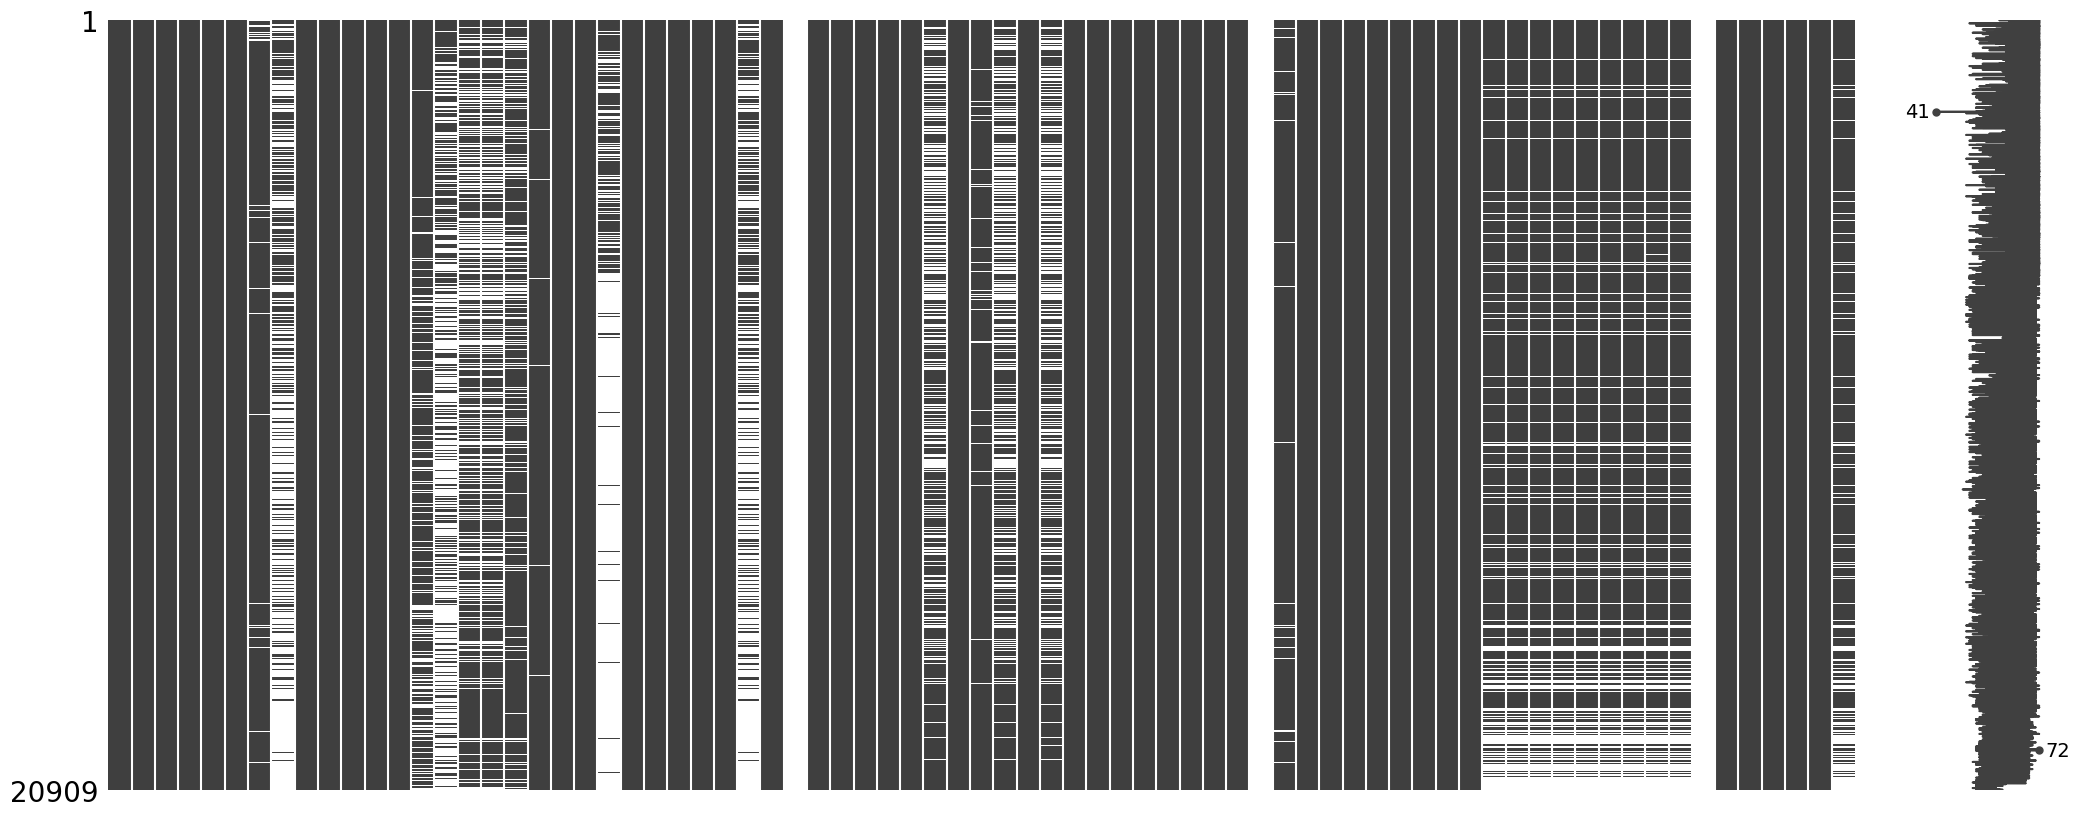

In [10]:
!pip3 install missingno
import missingno as msno
%matplotlib inline
msno.matrix(listings_df)



<AxesSubplot: >

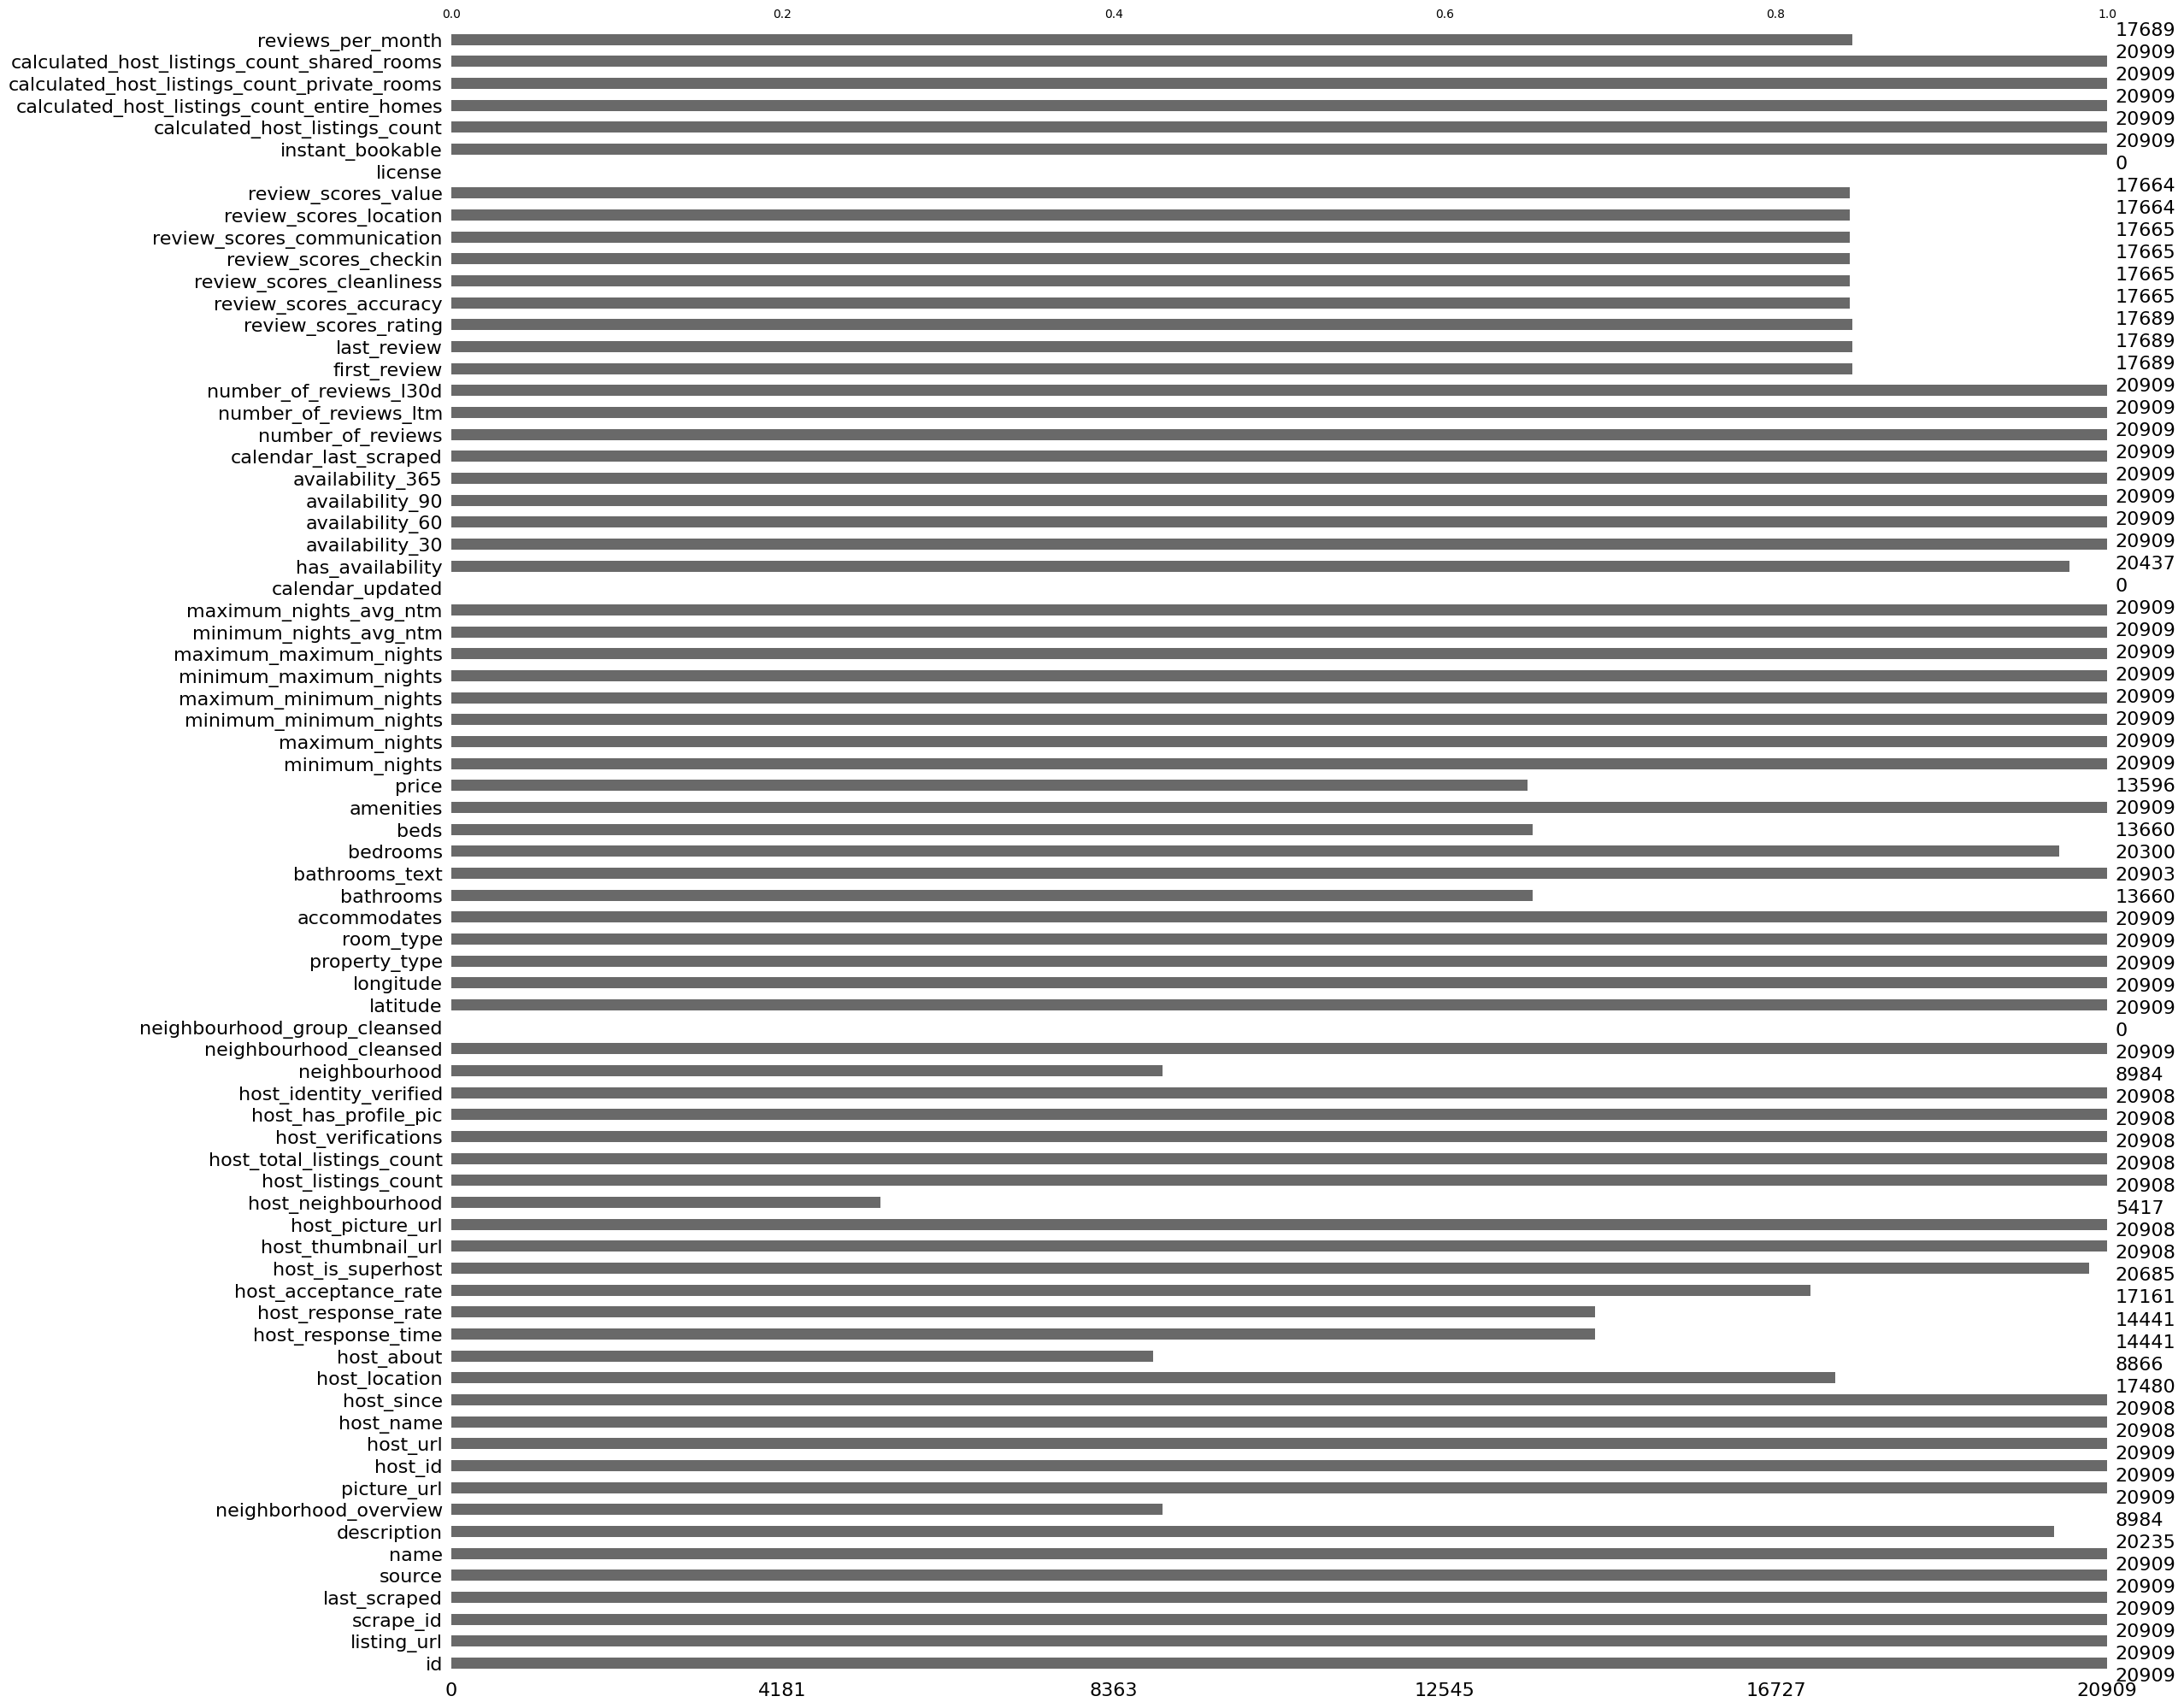

In [11]:
# Visualize the number of values there are 
# values as a bar chart 
msno.bar(listings_df) 

In [12]:
# Ducplicate values 
listings_df.duplicated().sum()

0

In [13]:
duplicate_rows = listings_df.duplicated(subset=listings_df.columns.difference(['id']), keep=False)
duplicate_rows.sum()

0

## Data Cleaning and Transformation / Enrichment 

### Drop columns

In [14]:
#Dropping the columns that has all missing values
listings_df.drop(['neighbourhood_group_cleansed', 'calendar_updated', 'license'], axis=1, inplace=True)

In [15]:
# Drop columns we deem not relevant to our project
listings_df.drop(['host_url','host_thumbnail_url','host_picture_url','picture_url', 'host_neighbourhood', 'host_about', 'neighbourhood', 'neighborhood_overview'], axis=1, inplace=True)

In [16]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20909 non-null  int64  
 1   listing_url                                   20909 non-null  object 
 2   scrape_id                                     20909 non-null  int64  
 3   last_scraped                                  20909 non-null  object 
 4   source                                        20909 non-null  object 
 5   name                                          20909 non-null  object 
 6   description                                   20235 non-null  object 
 7   host_id                                       20909 non-null  int64  
 8   host_name                                     20908 non-null  object 
 9   host_since                                    20908 non-null 

### Price

In [17]:
# Convert the price column from string to numeric format, also removing $ and commas
listings_df['price_cleaned'] = (
    listings_df['price']
    .str.replace('$', '', regex=False)  # 
    .str.replace(',', '', regex=False)  
    .astype(float)  
)

# Verify the conversion
print(listings_df[['price','price_cleaned']].head())
listings_df.drop(['price'], axis=1, inplace=True)

       price  price_cleaned
0        NaN            NaN
1  $1,865.00         1865.0
2    $905.00          905.0
3  $1,865.00         1865.0
4  $1,800.00         1800.0


In [18]:
# Create a new column 'price_per_person'
listings_df['price_per_person'] = listings_df['price_cleaned'] / listings_df['accommodates']

### Host

In [19]:
# Remove % symbol, convert to float, and scale by 100
listings_df['host_response_rate_float'] = (
    listings_df['host_response_rate']
    .str.replace('%', '', regex=False)  
    .replace('nan', None)              
    .astype(float) / 100               
)

listings_df['host_acceptance_rate_float'] = (
    listings_df['host_acceptance_rate']
    .str.replace('%', '', regex=False)
    .replace('nan', None)
    .astype(float) / 100
)

listings_df[['host_response_rate', 'host_response_rate_float', 'host_acceptance_rate', 'host_acceptance_rate_float']].head(10)

host_response_rate  host_response_rate_float host_acceptance_rate  \
0                NaN                       NaN                  NaN   
1                NaN                       NaN                 100%   
2               100%                      1.00                   0%   
3               100%                      1.00                 100%   
4                90%                      0.90                   0%   
5                NaN                       NaN                  NaN   
6                NaN                       NaN                  NaN   
7                67%                      0.67                   0%   
8               100%                      1.00                 100%   
9               100%                      1.00                 100%   

   host_acceptance_rate_float  
0                         NaN  
1                         1.0  
2                         0.0  
3                         1.0  
4                         0.0  
5                         NaN  
6                         NaN  
7                         0.0  
8                         1.0  
9                         1.0

In [20]:
#Drop the old columns
listings_df.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

### Neighbourhood

In [21]:
listings_df['neighbourhood_cleansed'].unique()

array(['Vesterbro-Kongens Enghave', 'Nrrebro', 'Amager st', 'sterbro',
       'Indre By', 'Bispebjerg', 'Amager Vest', 'Valby', 'Frederiksberg',
       'Vanlse', 'Brnshj-Husum'], dtype=object)

Some of the values are misspelled (probably from the scraping), since we can identify the misspelling we just map it back to the correct spelling: 

In [22]:
# Define a mapping of misspelled names to corrected names
correction_mapping = {
    'Amager st': 'Amager Øst',
    'Brnshj-Husum': 'Brønshøj-Husum',
    'Nrrebro': 'Nørrebro',
    'Vanlse': 'Vanløse',
    'sterbro': 'Østerbro'
}

# Apply corrections to the 'neighbourhood_cleansed' column
listings_df['neighbourhood_cleansed'] = listings_df['neighbourhood_cleansed'].replace(correction_mapping)

# Verify the corrected values
corrected_neighbours = listings_df['neighbourhood_cleansed'].unique()
print(corrected_neighbours)

['Vesterbro-Kongens Enghave' 'Nørrebro' 'Amager Øst' 'Østerbro' 'Indre By'
 'Bispebjerg' 'Amager Vest' 'Valby' 'Frederiksberg' 'Vanløse'
 'Brønshøj-Husum']


### Bathrooms

In [23]:
listings_df['bathrooms'] = listings_df['bathrooms_text'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
listings_df['shared_bathrooms'] = listings_df['bathrooms_text'].str.contains('shared', case=False, na=False)

listings_df[['bathrooms_text','shared_bathrooms','bathrooms']].head()

bathrooms_text  shared_bathrooms  bathrooms
0      1.5 baths             False        1.5
1      1.5 baths             False        1.5
2        0 baths             False        0.0
3        2 baths             False        2.0
4         1 bath             False        1.0

In [24]:
# Drop the column since we have derived all the useful information from it
listings_df.drop(['bathrooms_text'], axis=1, inplace=True)


### Amenties

In [25]:
# Enrich the dataframe with a new column with the number of amenties
listings_df['amenities_count'] = listings_df['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
listings_df[['id','amenities','amenities_count']].head(50)

id                                          amenities  amenities_count
0    31094  ["Toaster", "Refrigerator", "Conditioner", "Ho...               53
1   262961  ["Refrigerator", "Fire extinguisher", "Hot wat...               46
2   263036  ["Carbon monoxide alarm", "Backyard", "Kitchen...               16
3    32379  ["Carbon monoxide alarm", "Toaster", "Self che...               43
4   263708  ["Refrigerator", "Hot water", "Oven", "Paid pa...               35
5   264220                                     ["Essentials"]                1
6    32841  ["Free parking on premises", "Backyard", "Kitc...               10
7   279685  ["Refrigerator", "Free street parking", "Hot w...               25
8   287737  ["Refrigerator", "Conditioner", "Hot water", "...               22
9    38499  ["Toaster", "Self check-in", "Refrigerator", "...               36
10  300086  ["Carbon monoxide alarm", "Toaster", "Refriger...               34
11   39055  ["Toaster", "Refrigerator", "Conditioner", "Ho...               35
12  302659  ["Pack \u2019n play/Travel crib", "Refrigerato...               21
13  313237  ["Stove", "Kitchen", "Refrigerator", "Host gre...               18
14   65902  ["Backyard", "Refrigerator", "Dedicated worksp...               11
15  318437  ["Refrigerator", "Fire extinguisher", "Hot wat...               22
16  326898  ["Self check-in", "Refrigerator", "Hot water k...               43
17   69013  ["Toaster", "Refrigerator", "Hot water kettle"...               39
18  327621  ["Toaster", "Refrigerator", "TV", "Hot water k...               35
19  330915  ["Private entrance", "Hair dryer", "Host greet...               14
20  334127  ["Cooking basics", "Hair dryer", "Kitchen", "D...               16
21   69440  ["Carbon monoxide alarm", "Bidet", "Toaster", ...               43
22  338928  ["Toaster", "Sonos  sound system", "Refrigerat...               48
23  338992  ["Smoke alarm", "Heating", "Hangers", "Essenti...                5
24   71168  ["Toaster", "Self check-in", "Refrigerator", "...               39
25  339126  ["Pack \u2019n play/Travel crib", "Radiant hea...               67
26  341822  ["Toaster", "Rice maker", "Single level home",...               43
27  343137  ["Toaster", "Rice maker", "Refrigerator", "Hot...               42
28  112292  ["Private entrance", "Backyard", "Hair dryer",...               20
29  346877  ["55 inch HDTV with Apple TV, HBO Max", "Toast...               43
30  113508  ["Radiant heating", "Electrolux induction stov...               58
31  118649  ["Toaster", "Self check-in", "Refrigerator", "...               55
32  130253  ["Pets allowed", "Kitchen", "Washer", "Dryer",...                6
33  135777  ["Free parking on premises", "Kitchen", "Washe...                5
34  356861  ["Toaster", "Self check-in", "Refrigerator", "...               40
35  143230  ["Pack \u2019n play/Travel crib", "Toaster", "...               61
36  360501  ["Refrigerator", "Hot water", "First aid kit",...               22
37  362318  ["Refrigerator", "Hot water kettle", "Hot wate...               33
38  154529  ["Cooking basics", "Backyard", "Hair dryer", "...               19
39  155068  ["Rice maker", "Conditioner", "Hot water", "Go...               22
40  369967  ["Toaster", "Refrigerator", "Coffee maker: fre...               43
41  157093  ["Carbon monoxide alarm", "Toaster", "Self che...               48
42  391758  ["Pack \u2019n play/Travel crib", "Carbon mono...               53
43  173032  ["Free parking on premises", "Pets allowed", "...               10
44  395154  ["Toaster", "Self check-in", "Refrigerator", "...               41
45  401665  ["Refrigerator", "Fire extinguisher", "Hot wat...               25
46  409625  ["Refrigerator", "Hot water", "Oven", "Smoking...               24
47  176963  ["Carbon monoxide alarm", "Refrigerator", "Fir...               37
48  432409  ["Backyard", "Kitchen", "Dedicated workspace",...                9
49  441719  ["Refrigerator", "Hot water", "Oven", "Paid pa

In [26]:
 
amenities_df = listings_df.copy()
amenities_df['amenities'] = amenities_df['amenities'].str.strip("[]").str.replace('"', '')
df_exploded = amenities_df.assign(amenities=amenities_df['amenities'].str.split(', ')).explode('amenities')

df_exploded[['id','amenities']].head(50)

df_exploded.info()
amenties_dim = df_exploded[['id','amenities']]
amenties_dim.to_csv('amenities_dimension.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 593291 entries, 0 to 20908
Data columns (total 66 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            593291 non-null  int64  
 1   listing_url                                   593291 non-null  object 
 2   scrape_id                                     593291 non-null  int64  
 3   last_scraped                                  593291 non-null  object 
 4   source                                        593291 non-null  object 
 5   name                                          593291 non-null  object 
 6   description                                   576320 non-null  object 
 7   host_id                                       593291 non-null  int64  
 8   host_name                                     593285 non-null  object 
 9   host_since                                    593285 n

### Calendar Dimension: Availability rate

In [27]:
calendar_df = pd.read_csv('calendar2024.csv')

# Ensure the date column is in datetime format
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Extract the month and year for aggregation
calendar_df['year_month'] = calendar_df['date'].dt.to_period('M')

# Convert availability to a numeric format for calculations ('t' -> 1, 'f' -> 0)
calendar_df['availability_numeric'] = calendar_df['available'].map({'t': 1, 'f': 0})

# Aggregate by listing_id and year_month to calculate availability rate
aggregated_data = (
    calendar_df.groupby(['listing_id', 'year_month'])['availability_numeric']
    .mean()
    .reset_index()
)

# Convert availability rate back to percentage
aggregated_data['availability_rate'] = aggregated_data['availability_numeric'] * 100

# Drop the intermediate numeric column
aggregated_data = aggregated_data.drop(columns=['availability_numeric'])

# Save the aggregated data to a new CSV file
aggregated_data.to_csv('aggregated_availability_rate.csv', index=False)

print("Aggregated data has been saved to 'aggregated_availability_rate.csv'.")

Aggregated data has been saved to 'aggregated_availability_rate.csv'.


##  EDA

### Explore Missing Values

In [28]:
# Calculate total missing values
total_missing = listings_df.isnull().sum().sum()

# Display result
print(f"Total Missing Values in DataFrame: {(total_missing / listings_df.size)*100:.2f}%")

Total Missing Values in DataFrame: 5.54%


<AxesSubplot: >

<Figure size 1200x800 with 0 Axes>

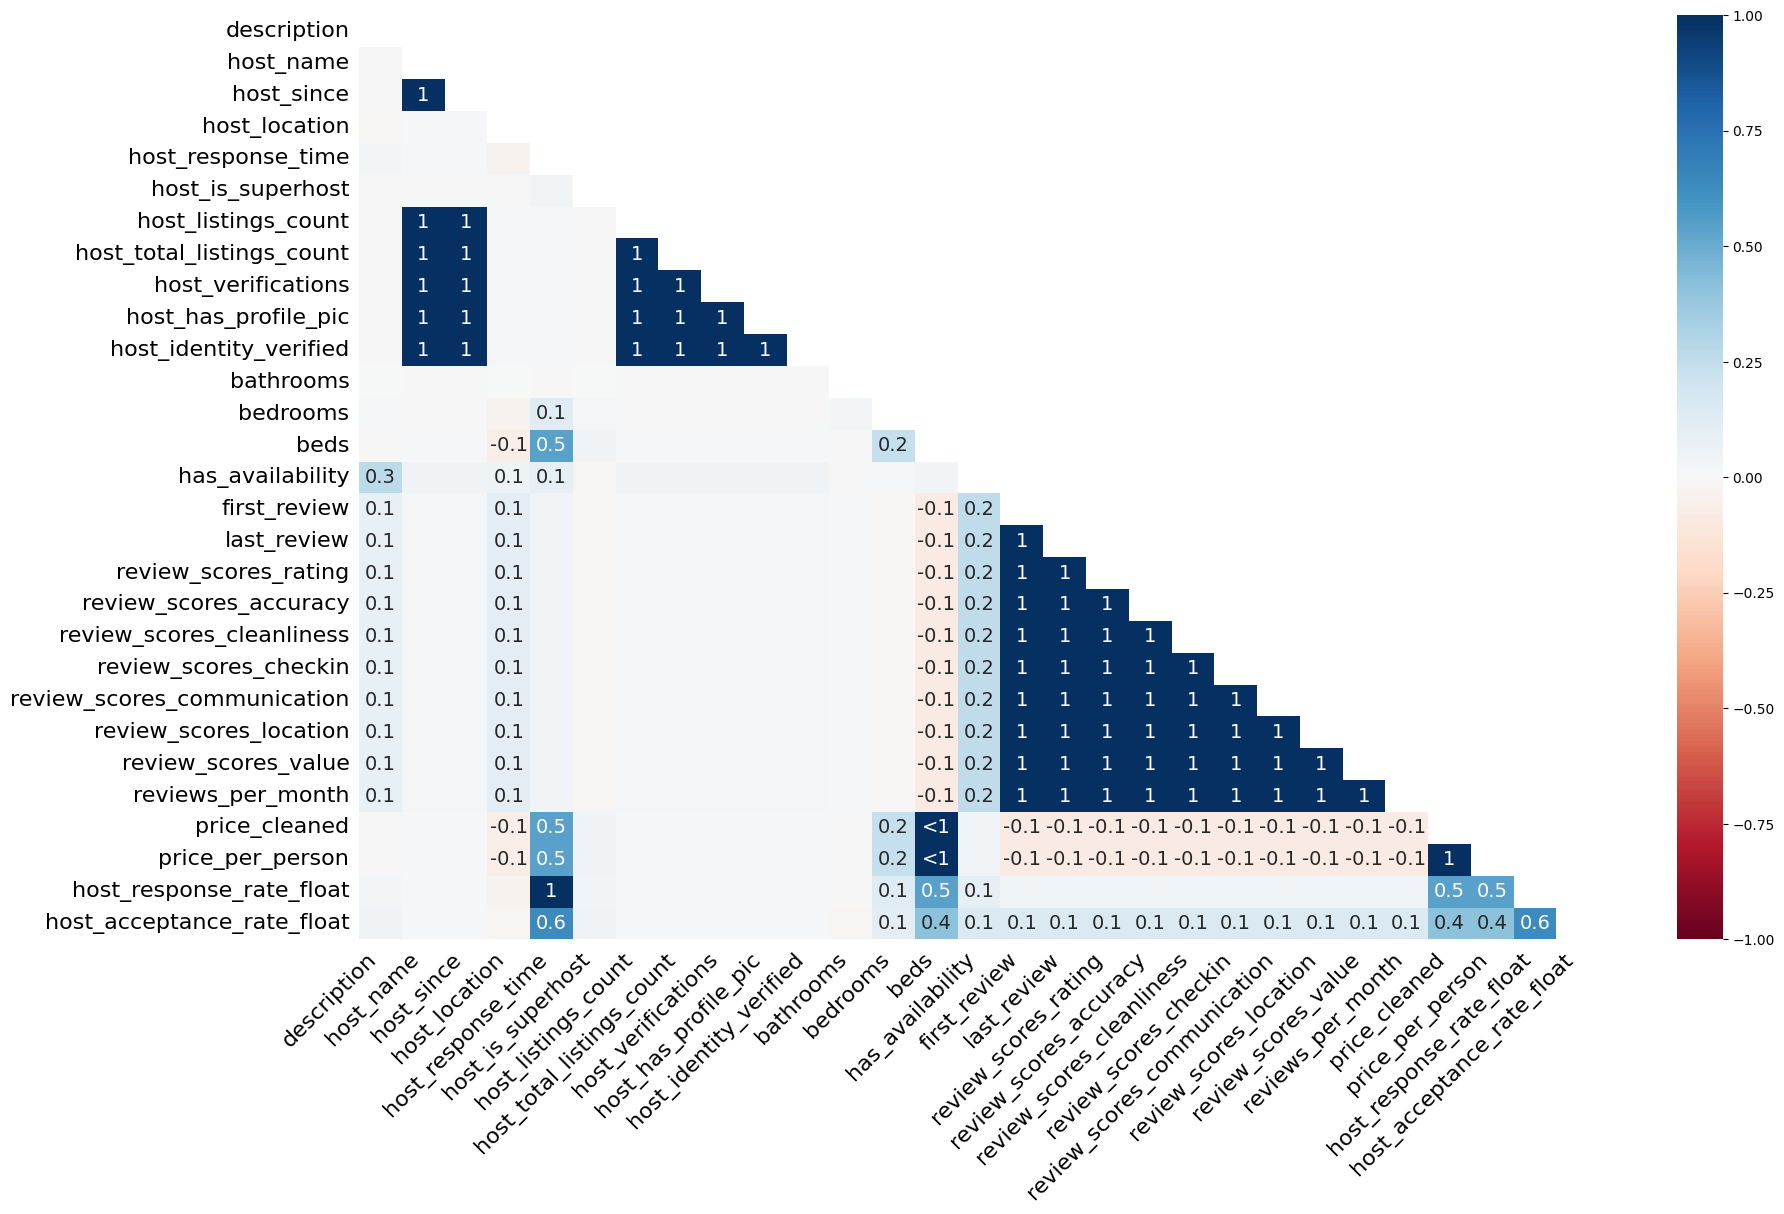

In [29]:
# Check correlation between missing values
plt.figure(figsize=(12, 8))
msno.heatmap(listings_df)

<AxesSubplot: >

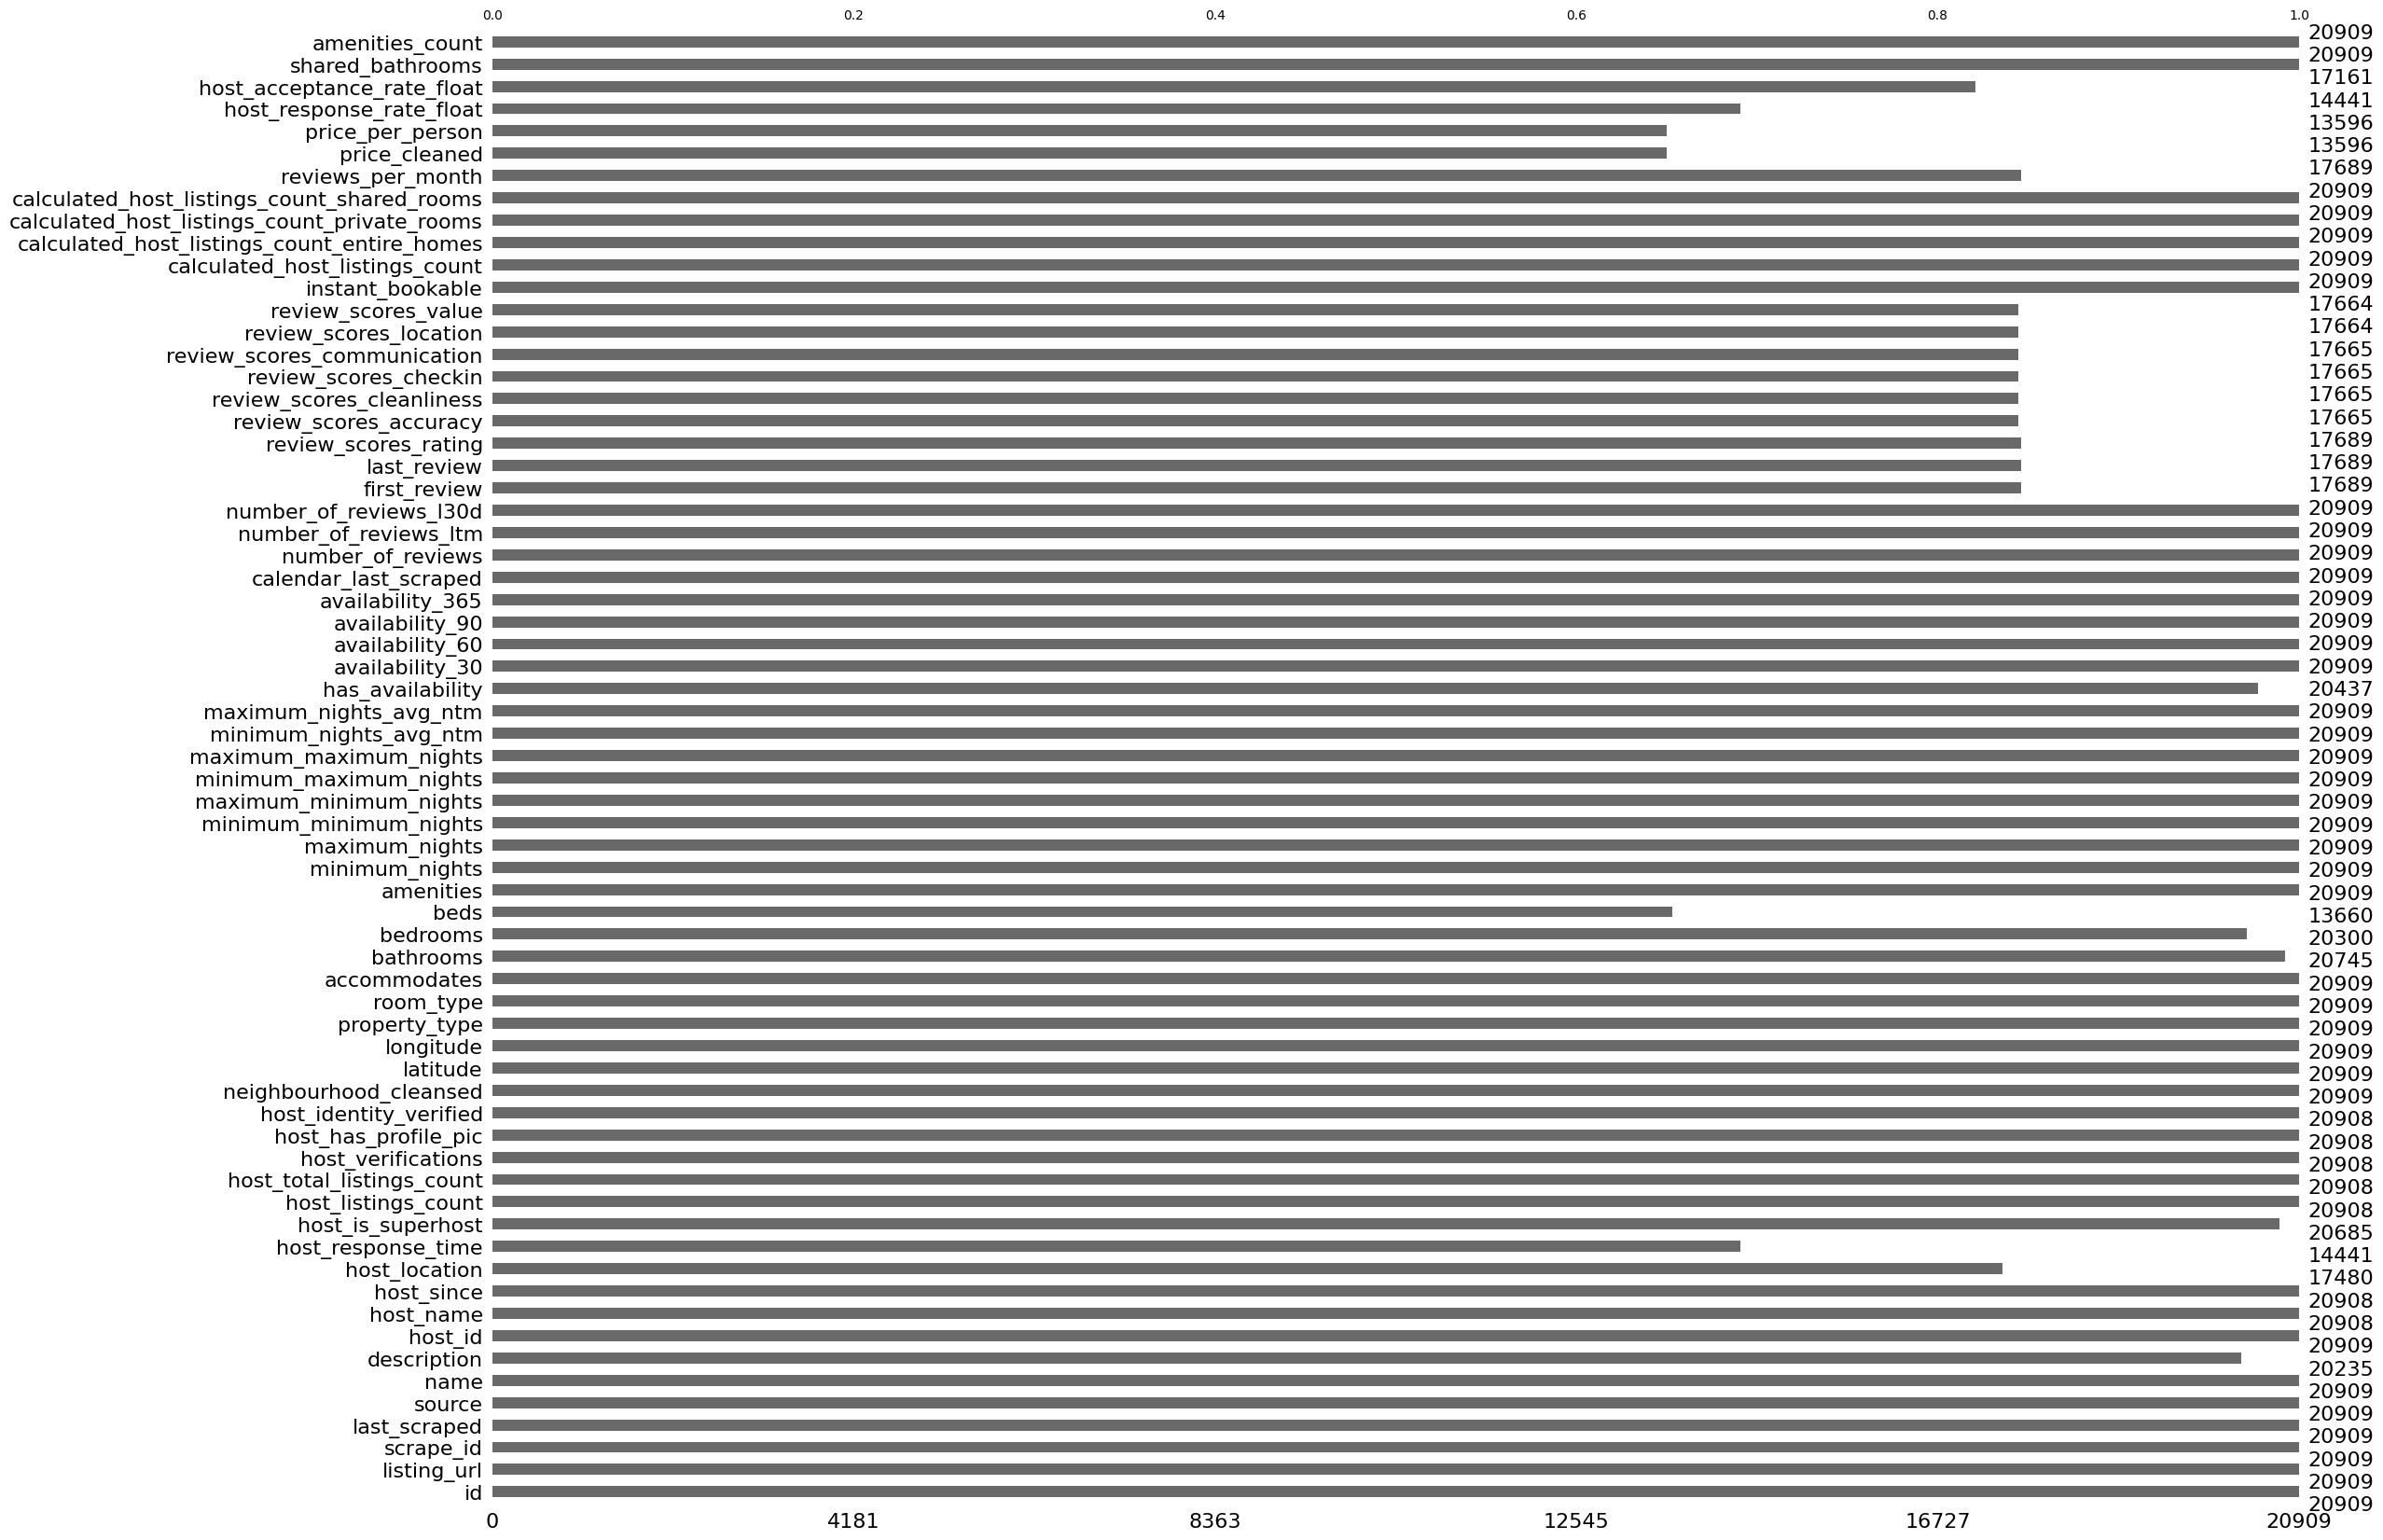

In [30]:
msno.bar(listings_df)

In [31]:
# Select only numeric columns for correlation
numeric_df = listings_df.select_dtypes(include=['float64', 'int64'])

# Add the binary 'is_price_null' column
numeric_df['is_price_null'] = listings_df['price_cleaned'].isnull().astype(int)

# Calculate correlations
correlations = numeric_df.corr()['is_price_null']
print(correlations)


id                                             -0.252488
scrape_id                                            NaN
host_id                                        -0.112303
host_listings_count                            -0.090257
host_total_listings_count                      -0.082480
latitude                                       -0.009686
longitude                                      -0.030029
accommodates                                   -0.063193
bathrooms                                      -0.037531
bedrooms                                       -0.015101
beds                                           -0.015990
minimum_nights                                  0.038040
maximum_nights                                  0.052844
minimum_minimum_nights                          0.049273
maximum_minimum_nights                          0.025925
minimum_maximum_nights                          0.125155
maximum_maximum_nights                          0.100485
minimum_nights_avg_ntm         

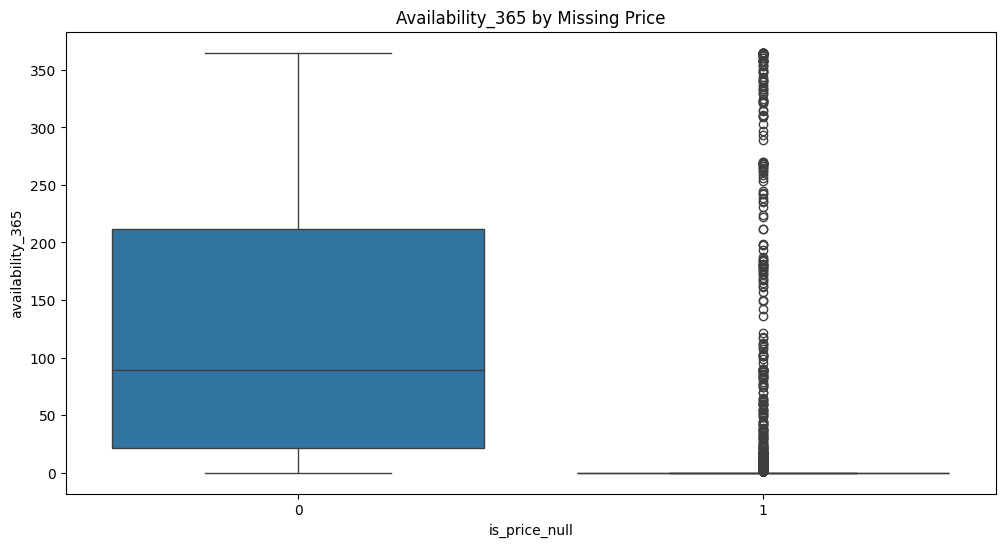

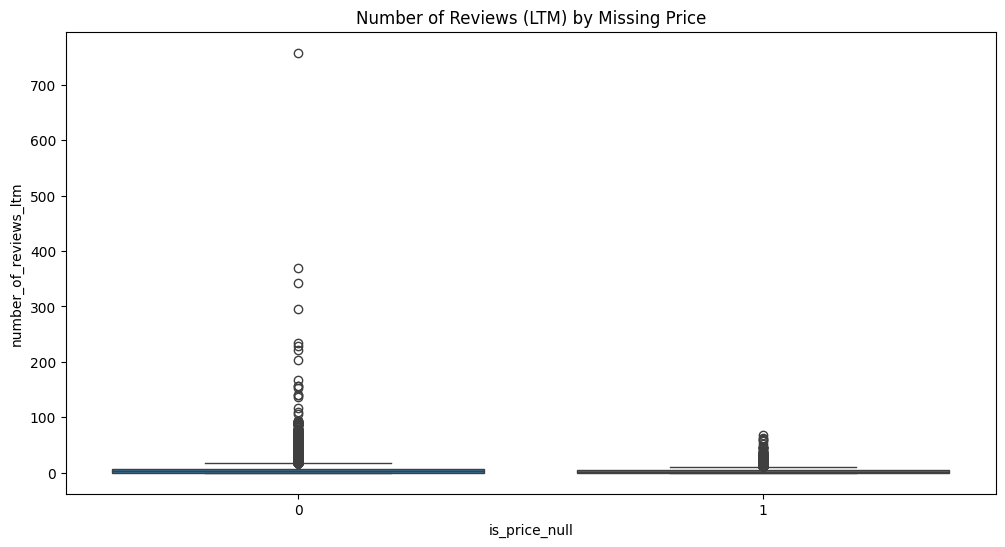

In [32]:
# Visualize availability vs. missing price
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_price_null', y='availability_365', data=numeric_df)
plt.title('Availability_365 by Missing Price')
plt.show()

# Visualize reviews_ltm vs. missing price
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_price_null', y='number_of_reviews_ltm', data=numeric_df)
plt.title('Number of Reviews (LTM) by Missing Price')
plt.show()


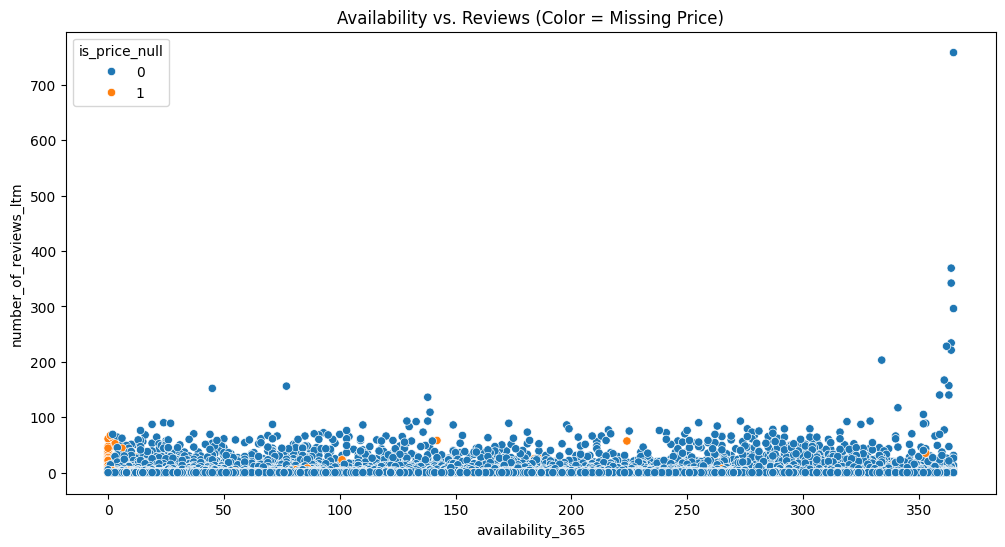

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews_ltm', hue='is_price_null', data=numeric_df)
plt.title('Availability vs. Reviews (Color = Missing Price)')
plt.show()


In [34]:
availability_threshold = 1  # Listings with <10 days availability
review_threshold = 1  # Listings with fewer than 1 review in the last year

listings_df['status'] = np.where(
    (listings_df['availability_365'] < availability_threshold),
    'Inactive',
    'Active'
)

'''listings_df['status'] = np.where(
    (listings_df['number_of_reviews_ltm'] < review_threshold),
    'Inactive',
    'Active'
)
'''


"listings_df['status'] = np.where(\n    (listings_df['number_of_reviews_ltm'] < review_threshold),\n    'Inactive',\n    'Active'\n)\n"

In [35]:
# Filter for active listings
active_listings = listings_df[listings_df['status'] == 'Active']

# Count missing price values in active listings
missing_prices_active = active_listings['price_cleaned'].isnull().sum()

# Total number of active listings
total_active = len(active_listings)

# Display the results
print(f"Total Active Listings: {total_active}")
print(f"Active Listings with Missing Prices: {missing_prices_active}")
print(f"Percentage of Active Listings with Missing Prices: {(missing_prices_active / total_active) * 100:.2f}%")


Total Active Listings: 14989
Active Listings with Missing Prices: 1498
Percentage of Active Listings with Missing Prices: 9.99%


In [36]:
active_total_missing = active_listings.isnull().sum().sum()
print(f"Total Missing Values in DataFrame: {(active_total_missing / active_listings.size)*100:.2f}%")

Total Missing Values in DataFrame: 3.76%


In [37]:
listings_df[(listings_df['status']=='Active')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14989 entries, 2 to 20908
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14989 non-null  int64  
 1   listing_url                                   14989 non-null  object 
 2   scrape_id                                     14989 non-null  int64  
 3   last_scraped                                  14989 non-null  object 
 4   source                                        14989 non-null  object 
 5   name                                          14989 non-null  object 
 6   description                                   14507 non-null  object 
 7   host_id                                       14989 non-null  int64  
 8   host_name                                     14989 non-null  object 
 9   host_since                                    14989 non-null  obje

<AxesSubplot: >

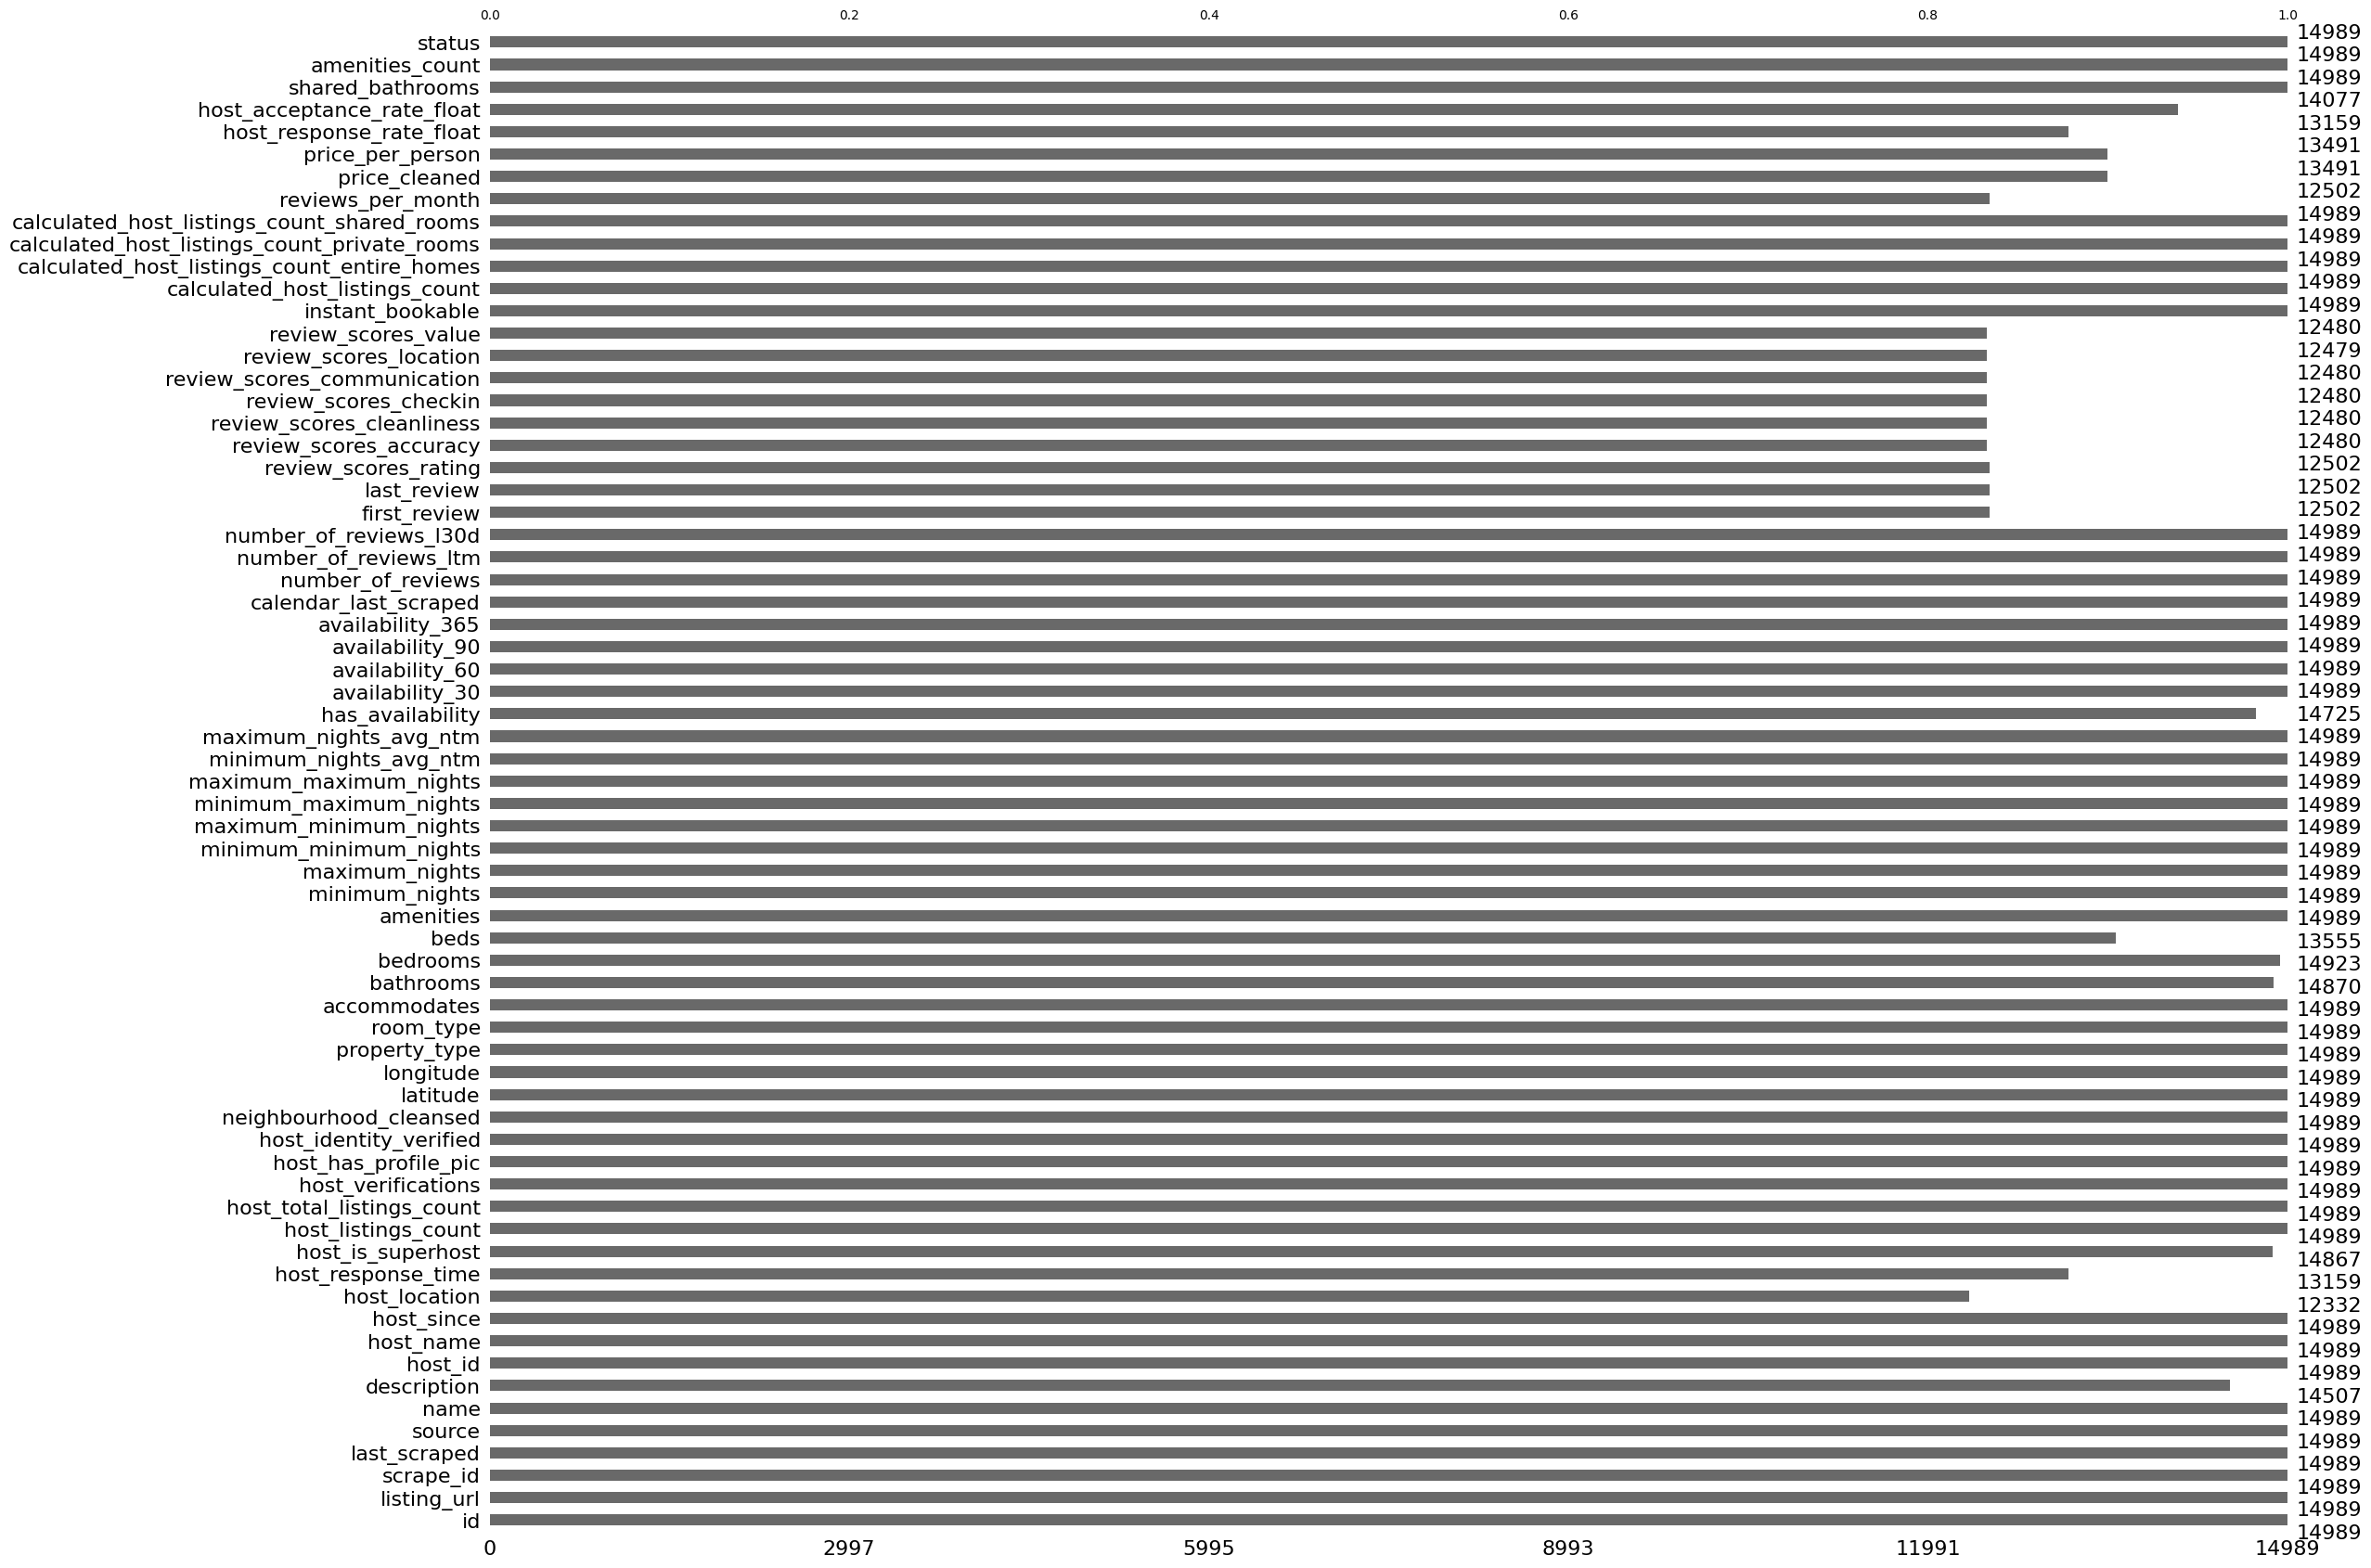

In [38]:
msno.bar(active_listings)

<AxesSubplot: >

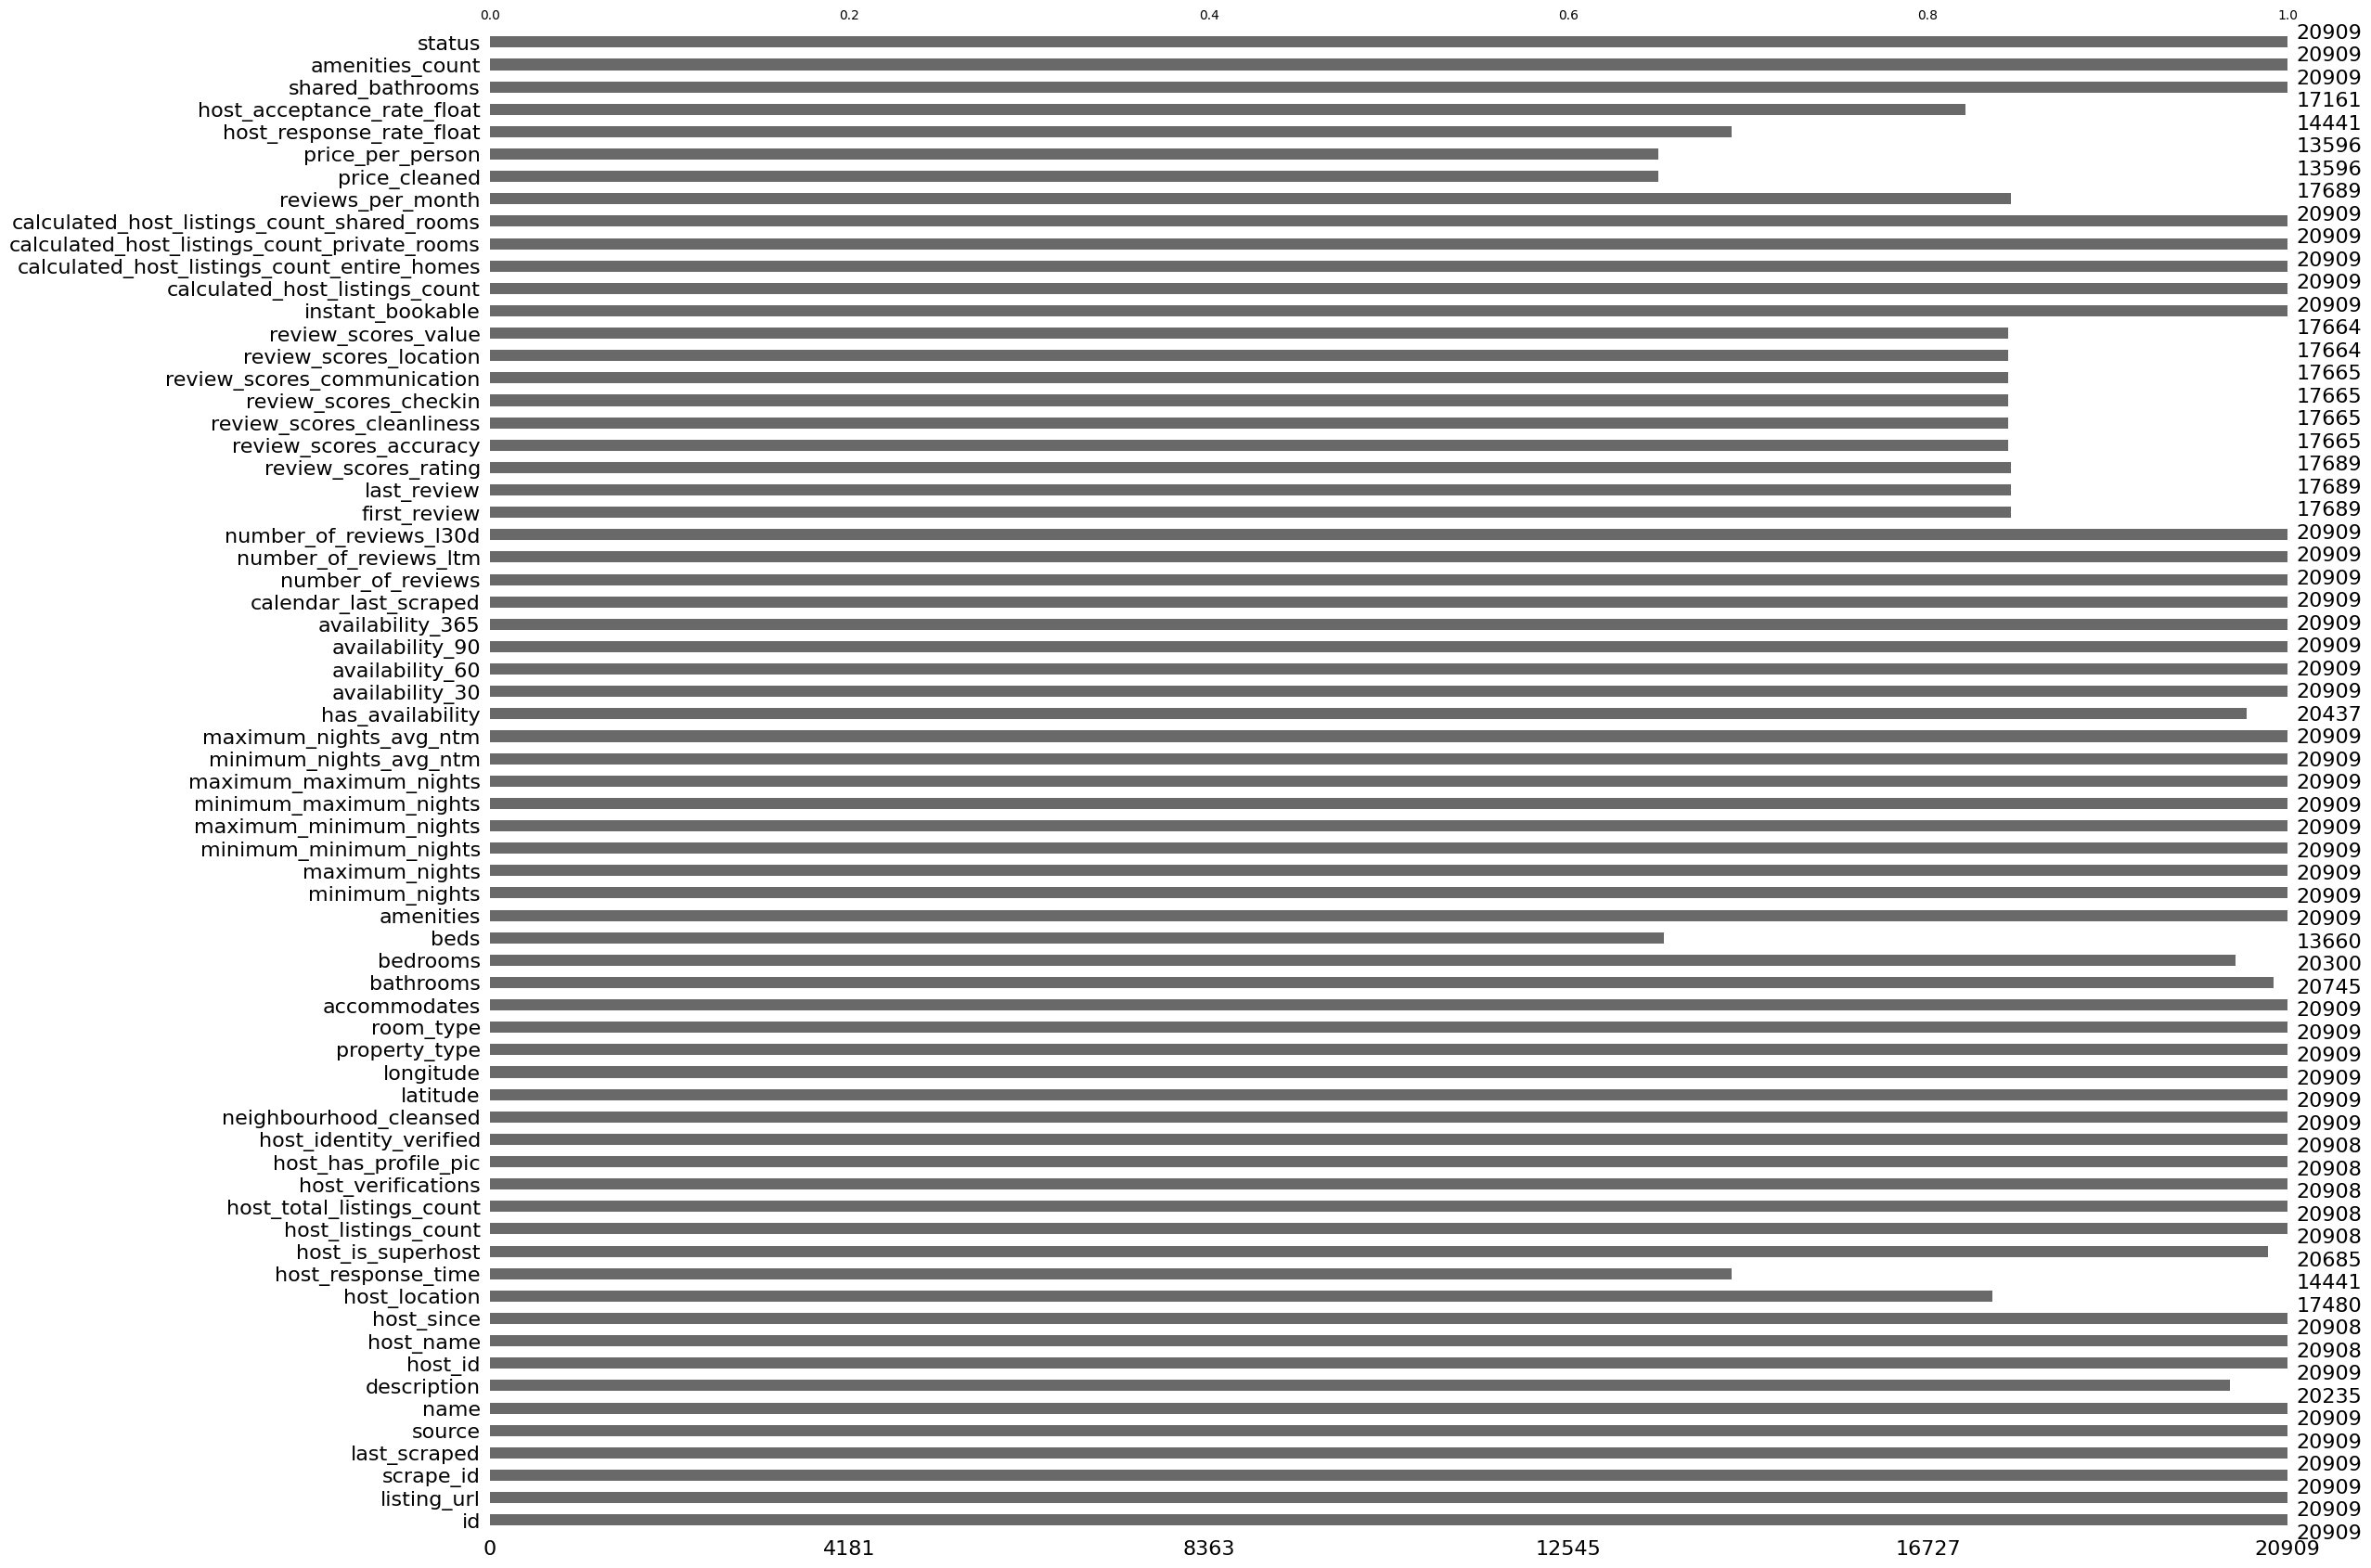

In [39]:
msno.bar(listings_df)

### Distributions and Outliers 

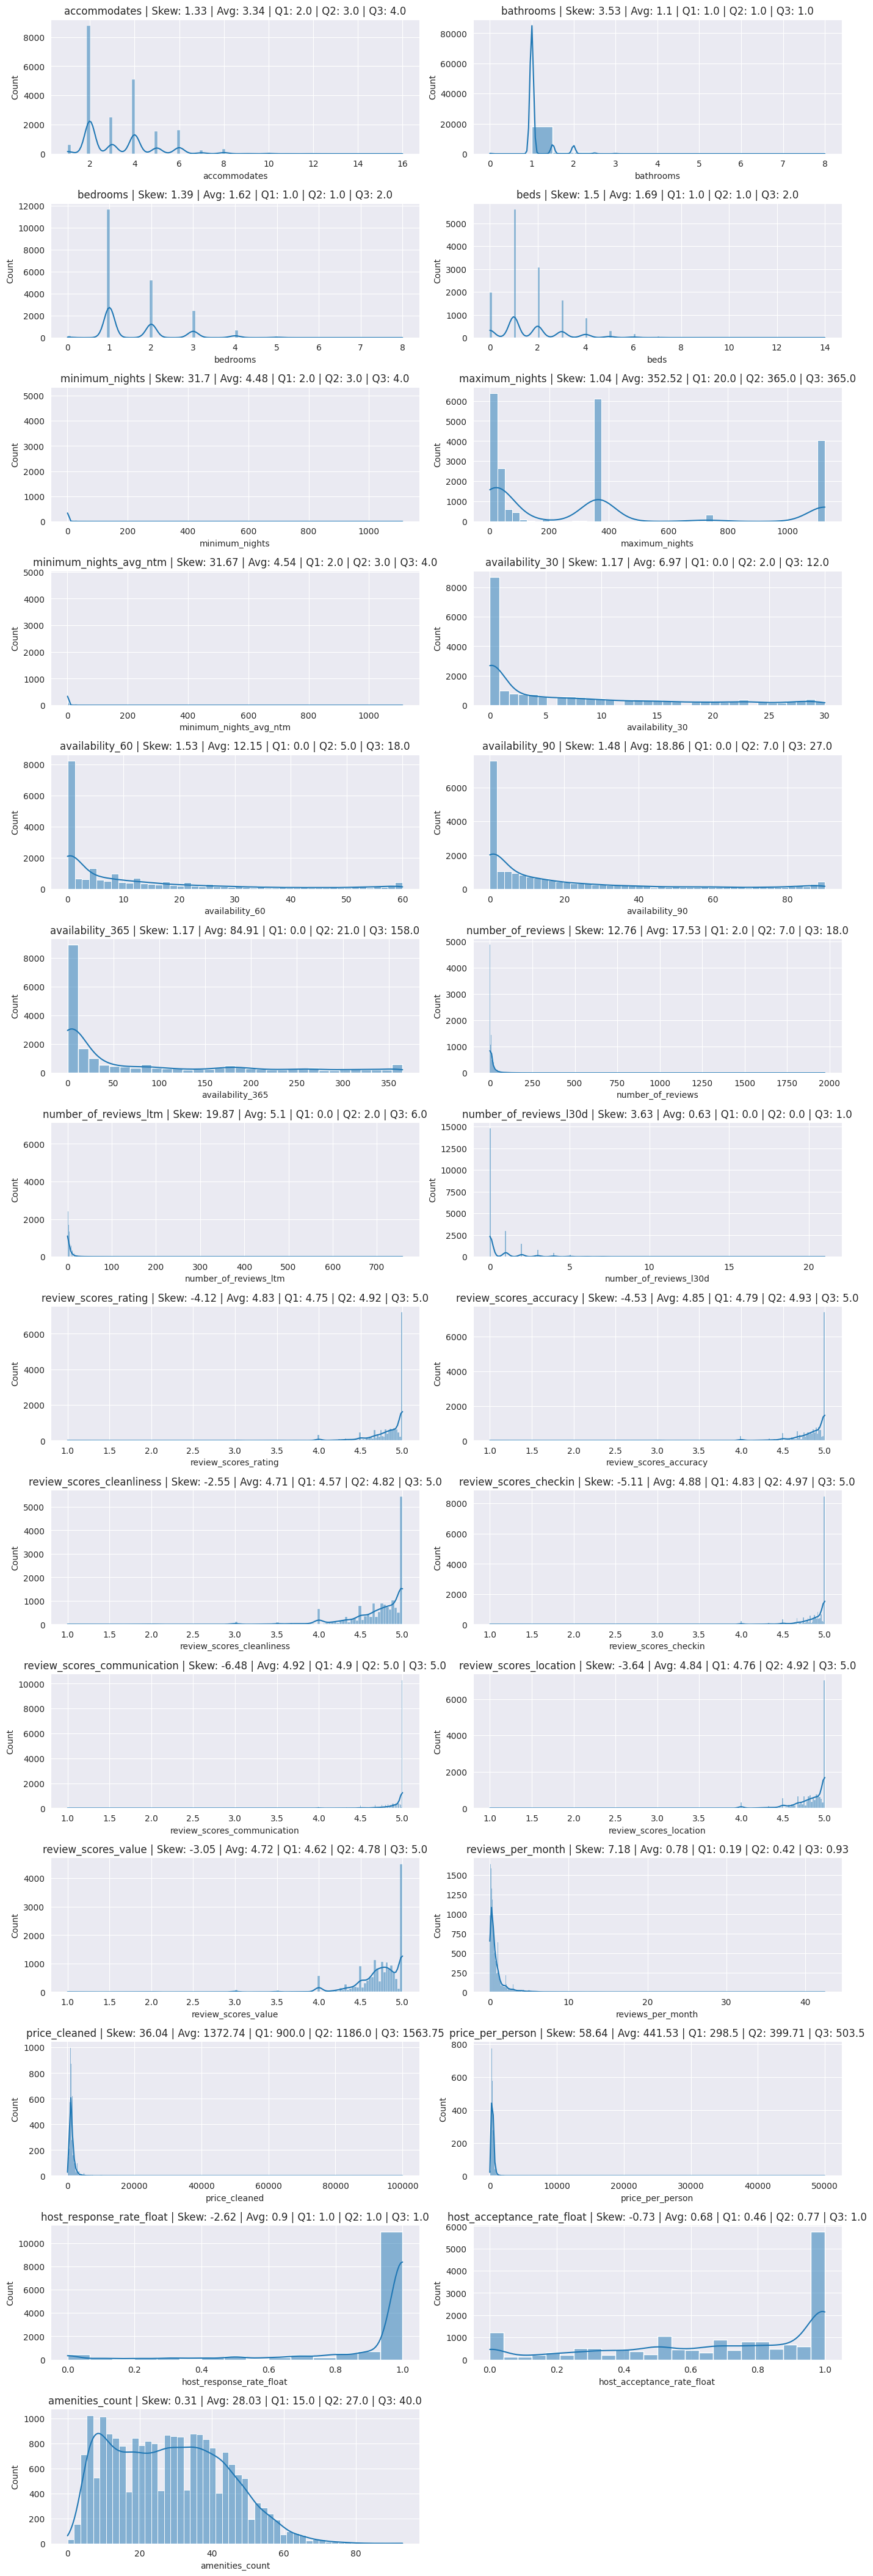

In [40]:
sns.set_style("darkgrid")

exclude_columns = [
    'id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count',
    'latitude', 'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg',
    'maximum_nights_avg_ntm', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'listings_url', 'last_scraped',
    'source', 'name', 'description', 'neighborhood_overview', 'host_name', 'host_location',
    'host_about', 'calendar_last_scraped'
]

# Identify numerical columns
numerical_columns = [col for col in listings_df.select_dtypes(include=["int64", "float64"]).columns if col not in exclude_columns]

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(listings_df[feature], kde=True)
    
    # Calculate skewness, mean, and quantiles
    skewness = round(listings_df[feature].skew(), 2)
    mean_value = round(listings_df[feature].mean(), 2)
    q1, q2, q3 = listings_df[feature].quantile([0.25, 0.5, 0.75]).round(2)
    
    # Set title with skewness, mean, and quantiles
    plt.title(f"{feature} | Skew: {skewness} | Avg: {mean_value} | Q1: {q1} | Q2: {q2} | Q3: {q3}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()



/tmp/ipykernel_54/3786729875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=listings_df[feature], order=listings_df[feature].value_counts().index[:10], palette='viridis')
/tmp/ipykernel_54/3786729875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=listings_df[feature], order=listings_df[feature].value_counts().index[:10], palette='viridis')
/tmp/ipykernel_54/3786729875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=listings_df[feature], order=listings_df[feature].value_counts().index[:10], palette='viridis')
/tmp/ip

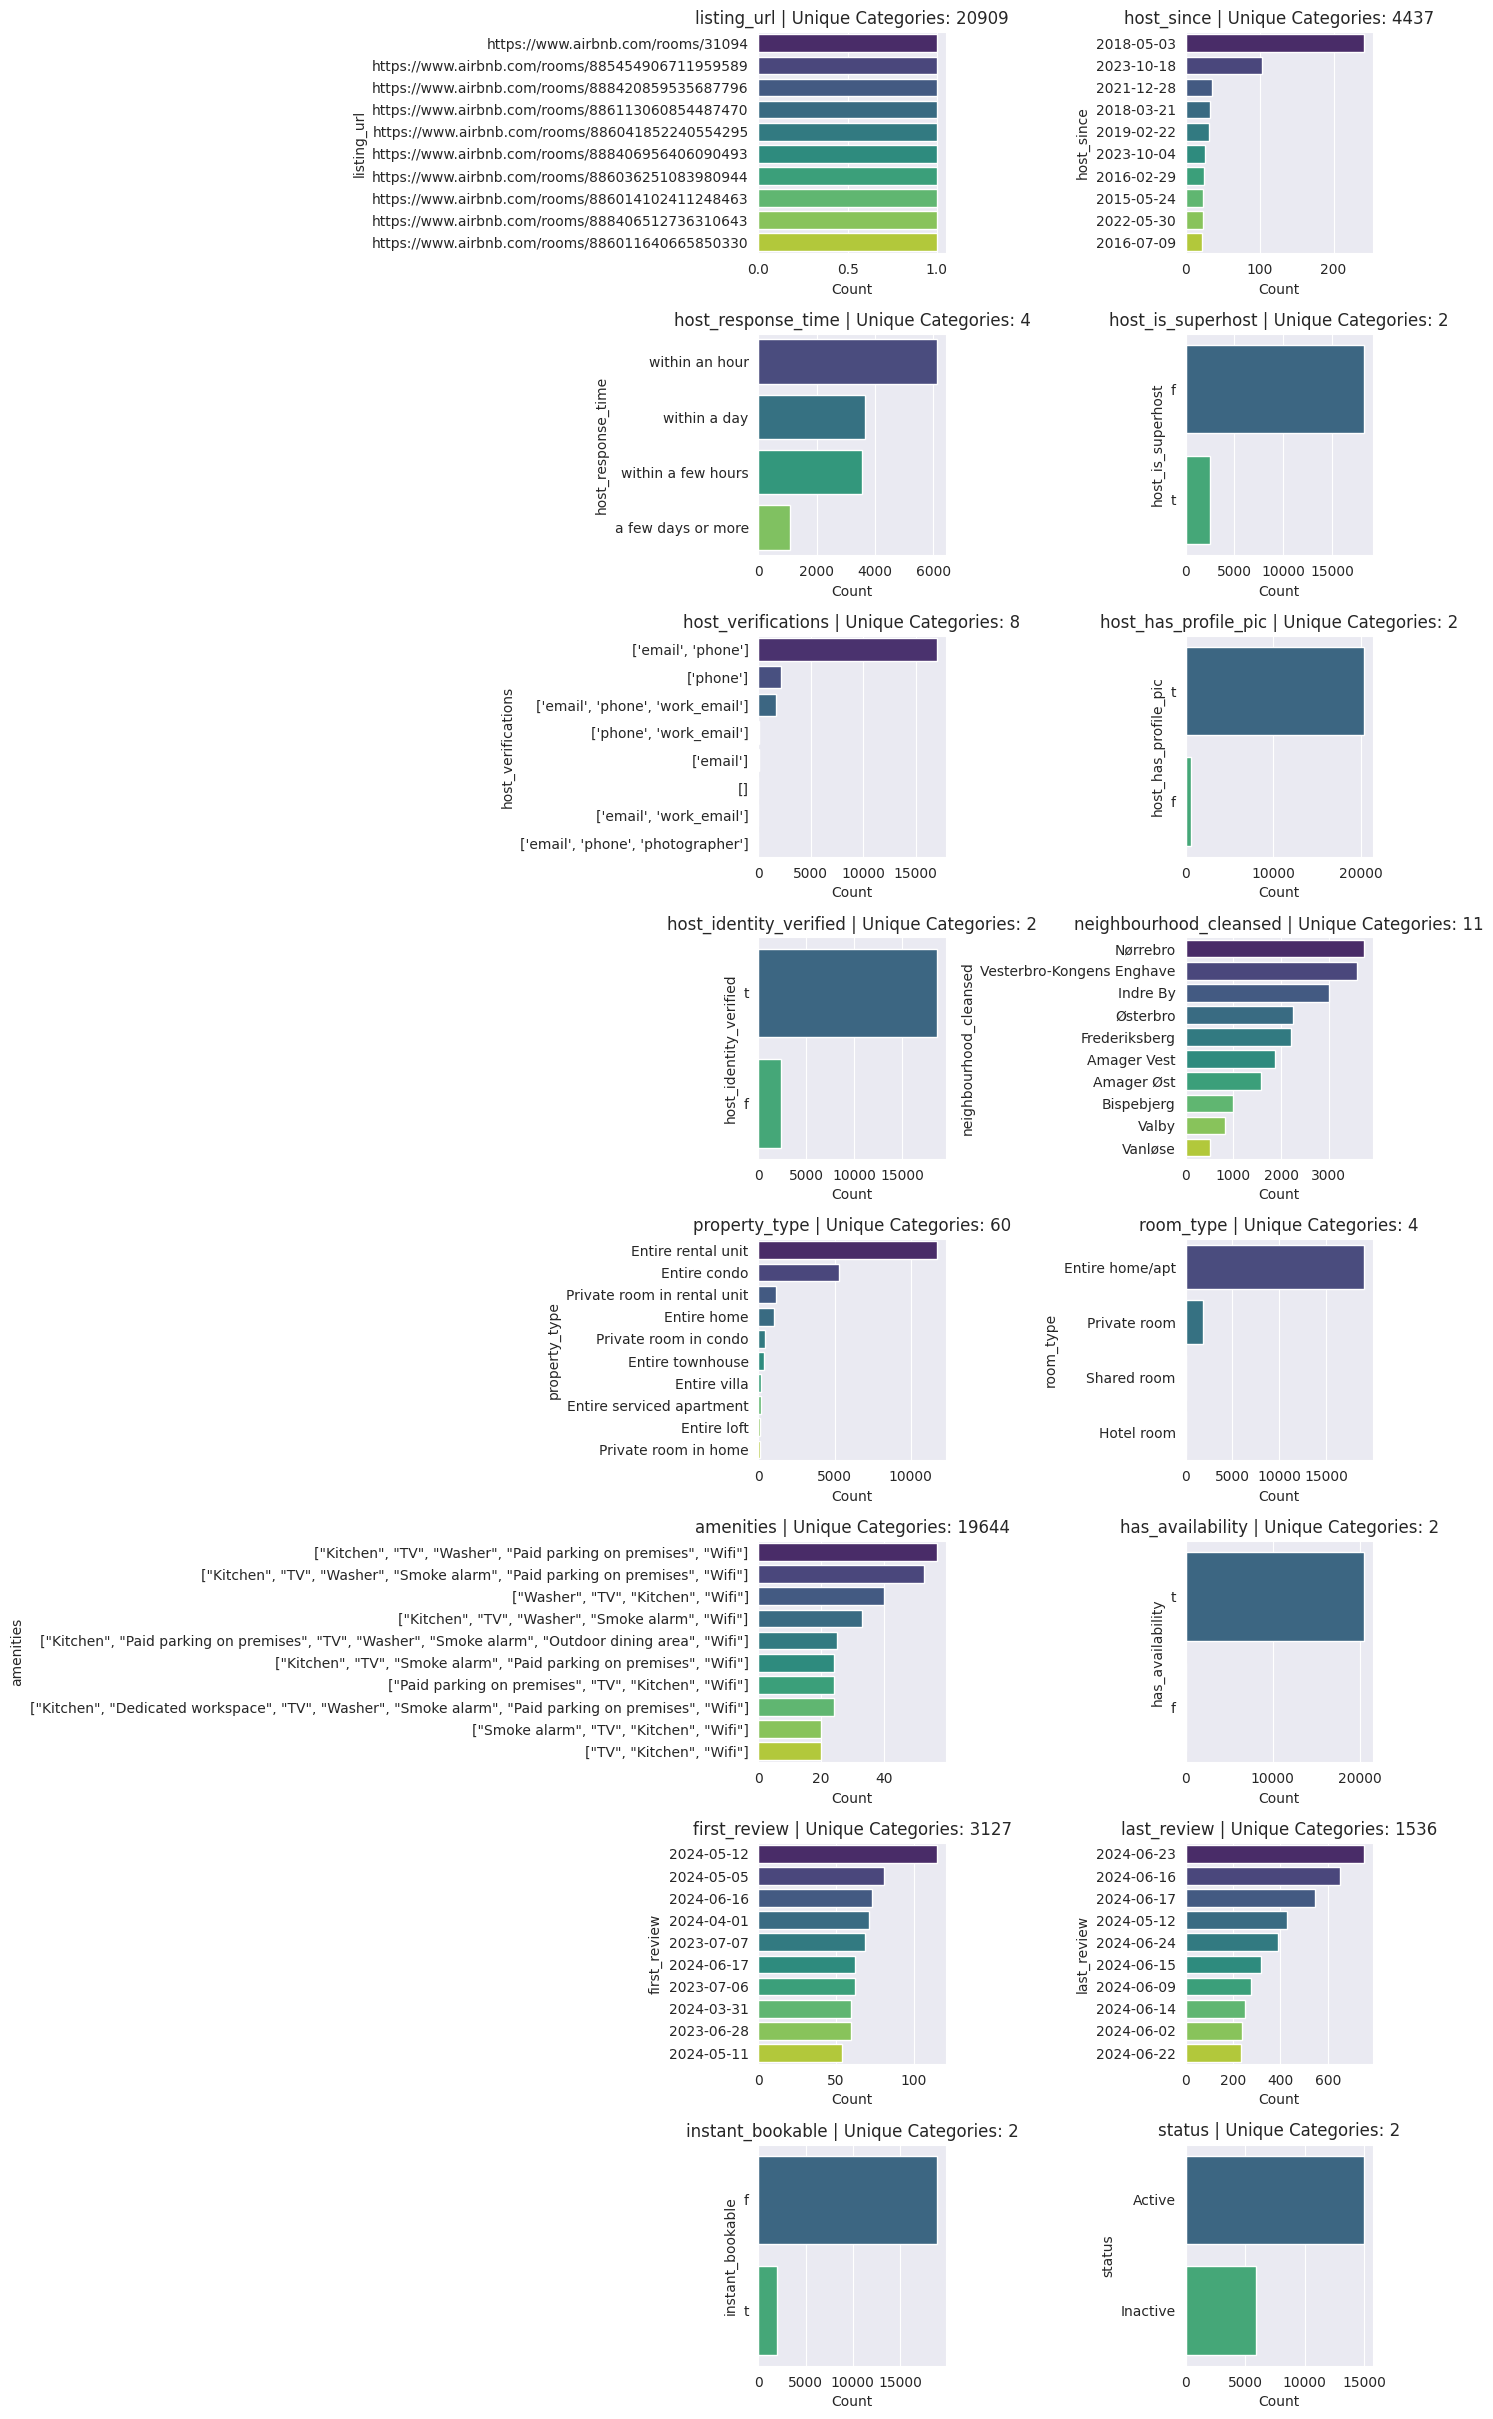

In [41]:

categorical_cols = [col for col in listings_df.select_dtypes(include=["object", "category"]).columns if col not in exclude_columns]

  
plt.figure(figsize=(14, len(categorical_cols) * 3))
for idx, feature in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, idx)
    sns.countplot(y=listings_df[feature], order=listings_df[feature].value_counts().index[:10], palette='viridis')
    plt.title(f"{feature} | Unique Categories: {listings_df[feature].nunique()}")
    plt.xlabel("Count")
    plt.ylabel(feature)

# Adjust layout and show plots
plt.tight_layout()
plt.show()




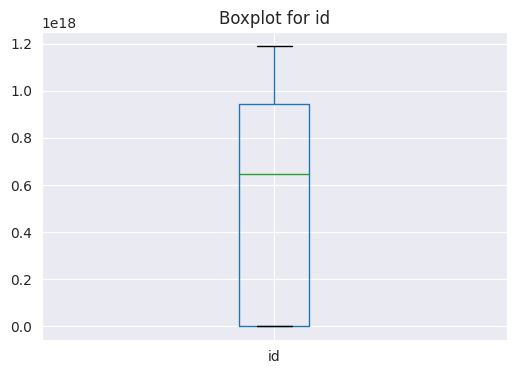

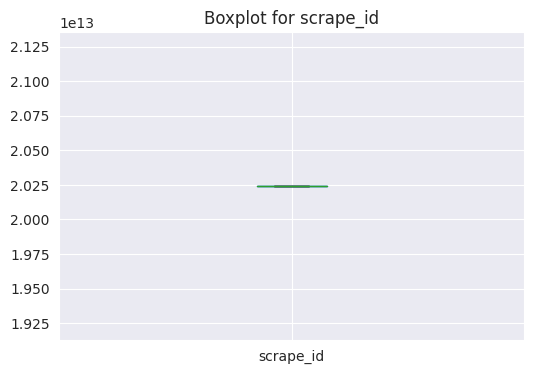

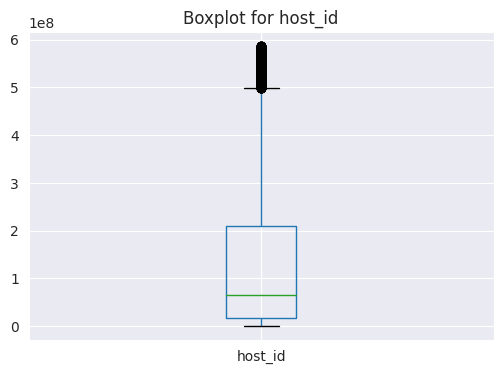

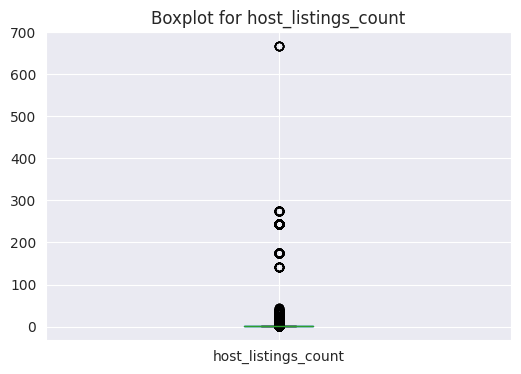

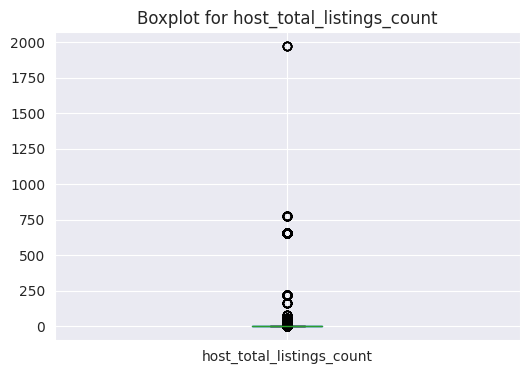

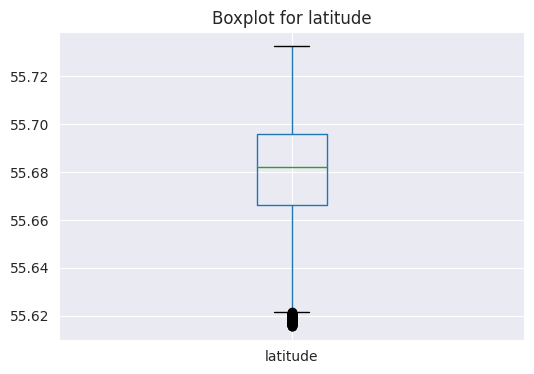

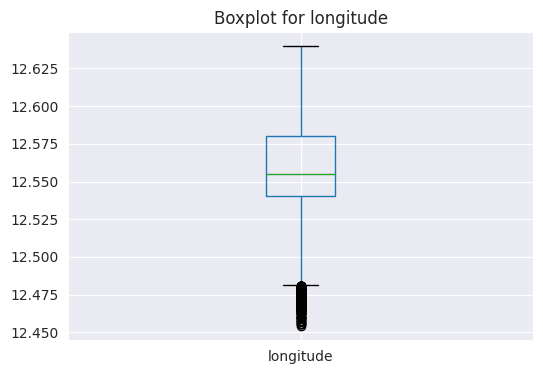

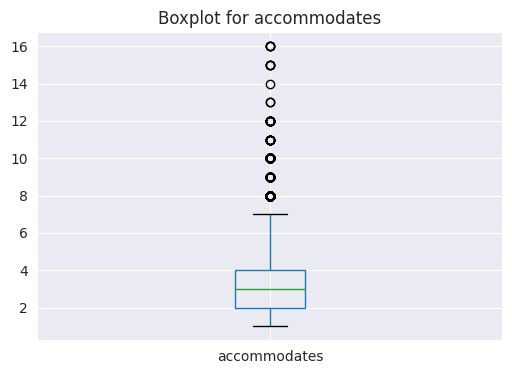

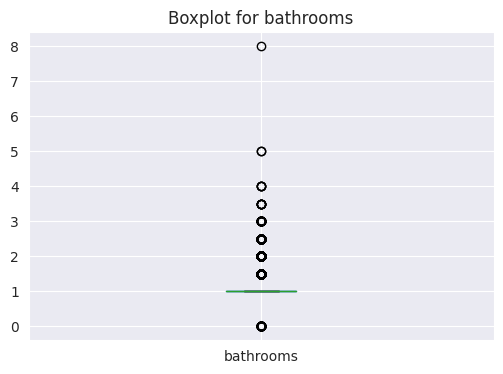

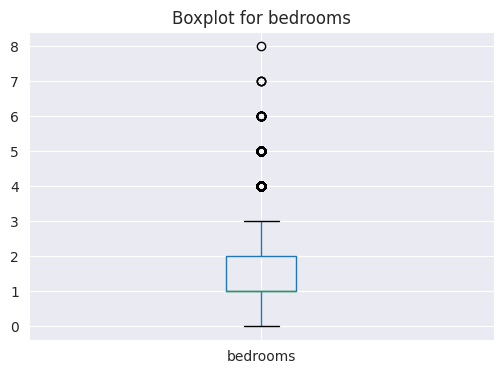

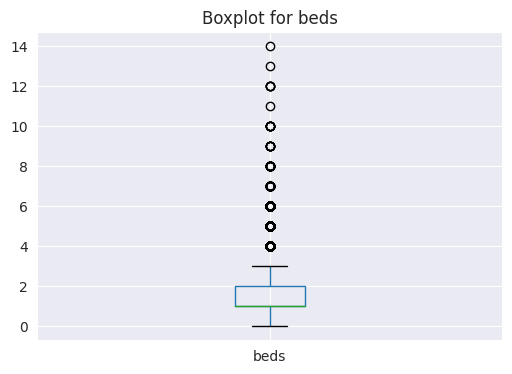

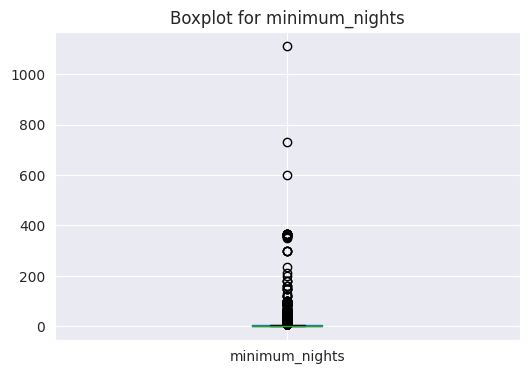

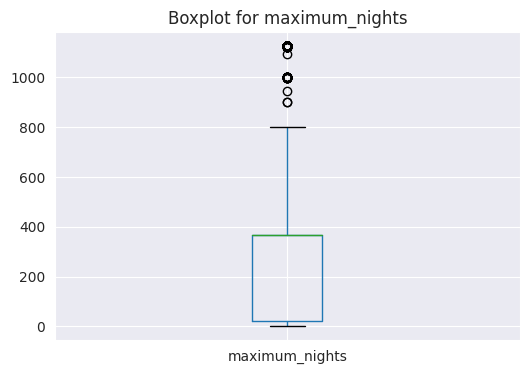

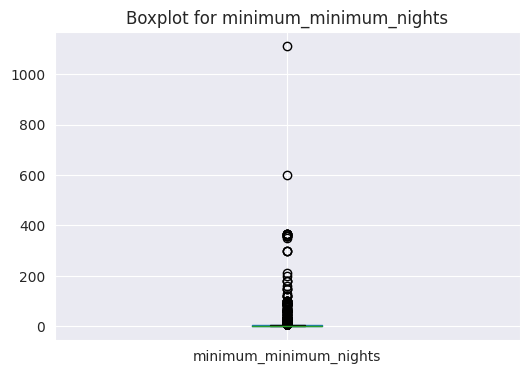

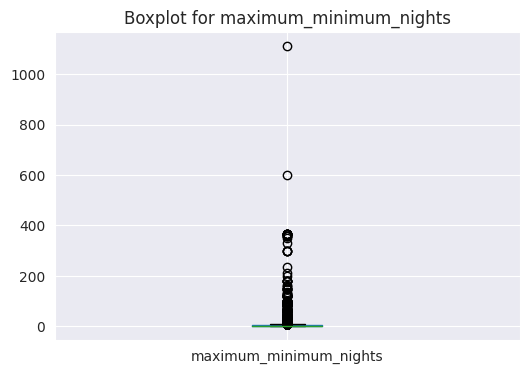

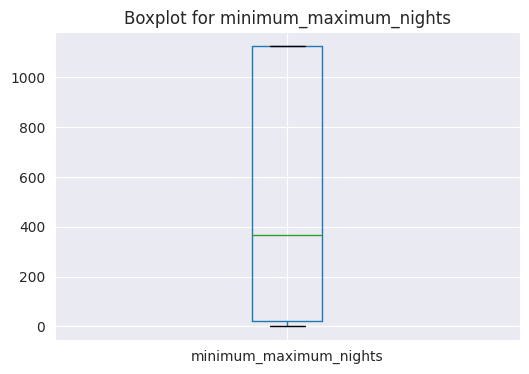

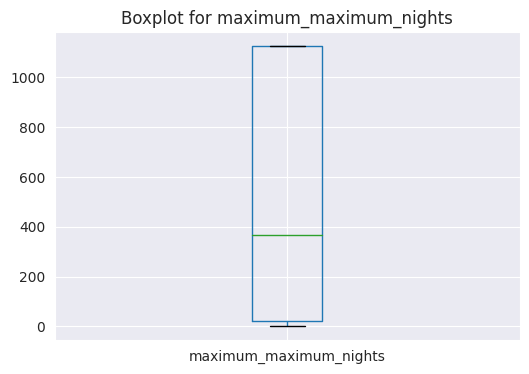

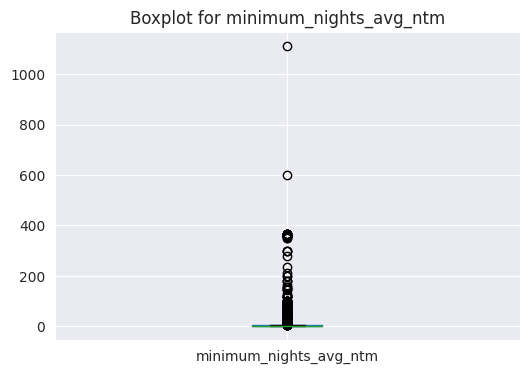

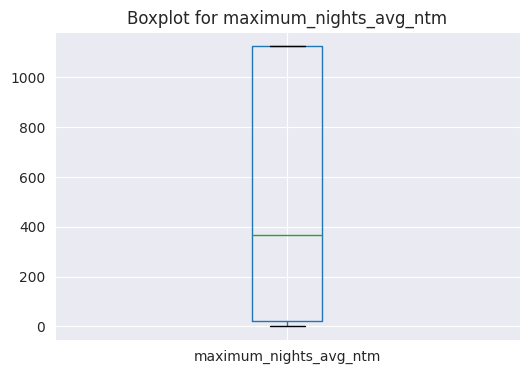

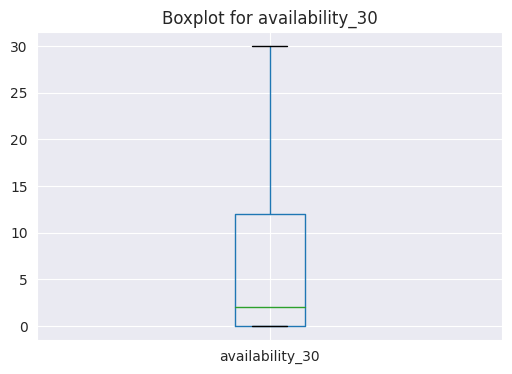

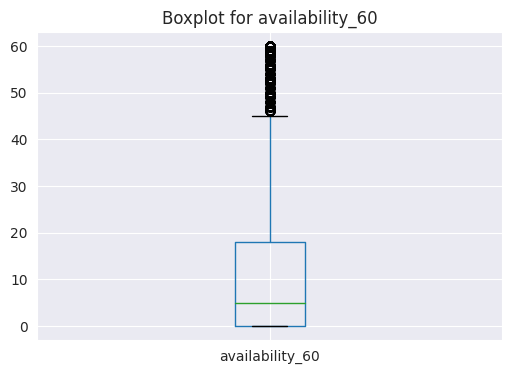

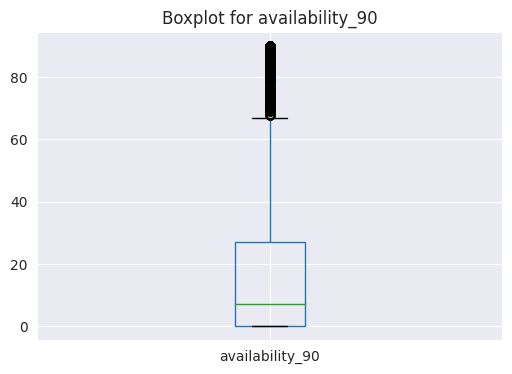

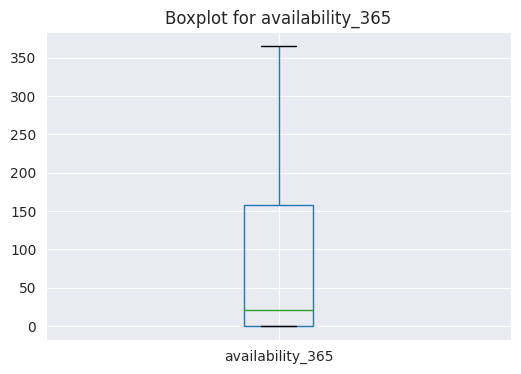

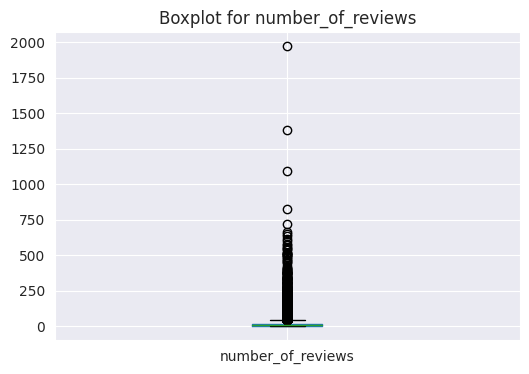

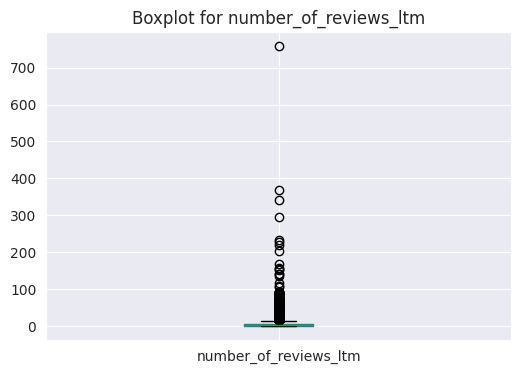

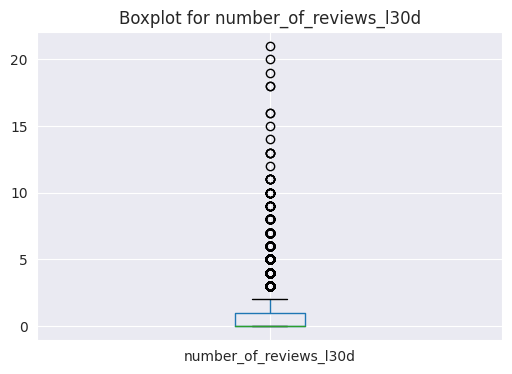

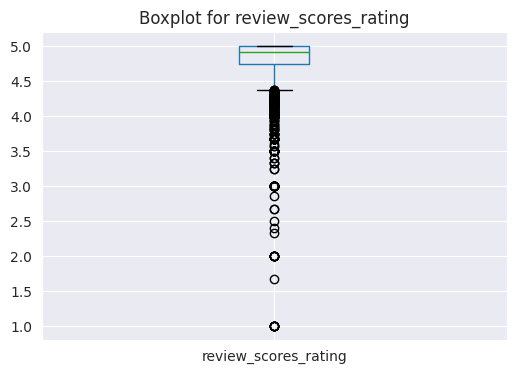

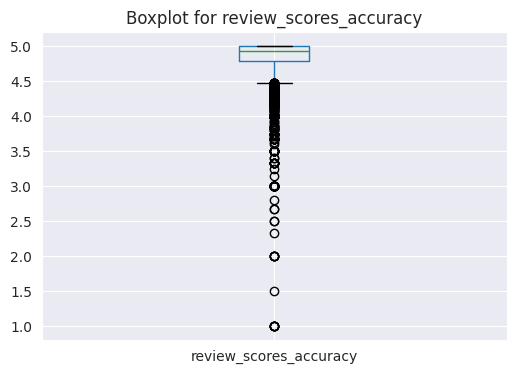

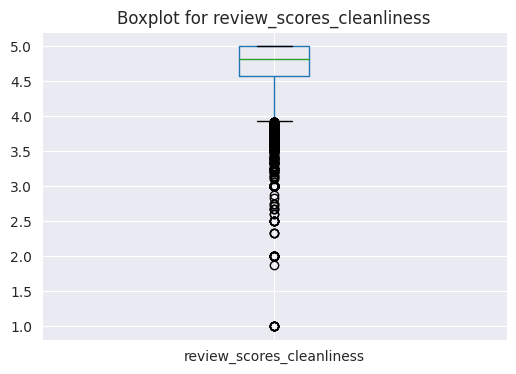

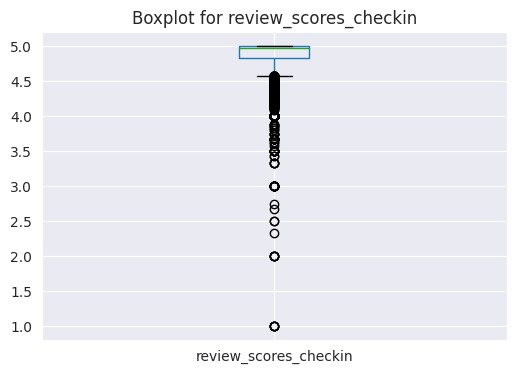

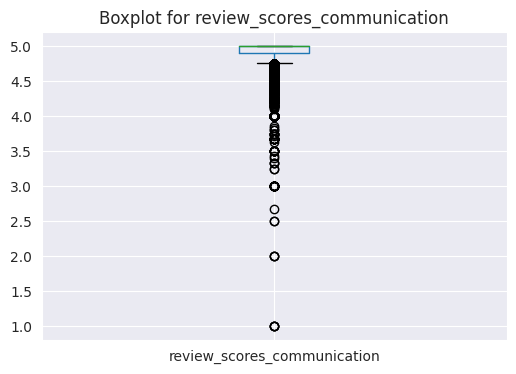

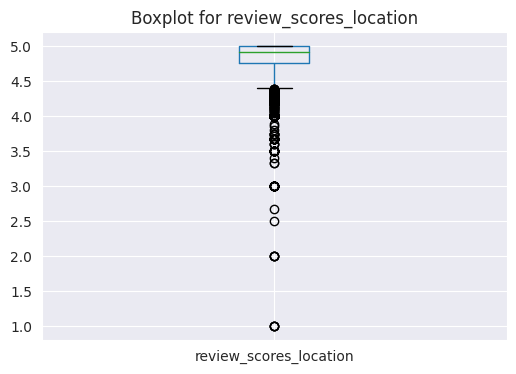

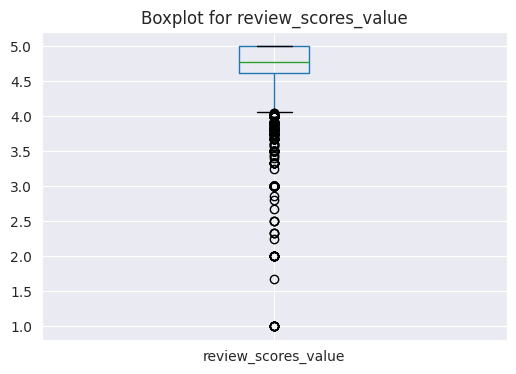

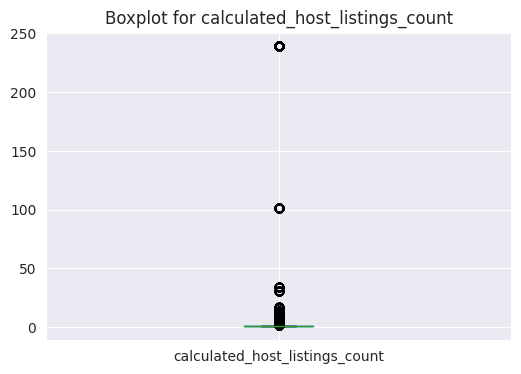

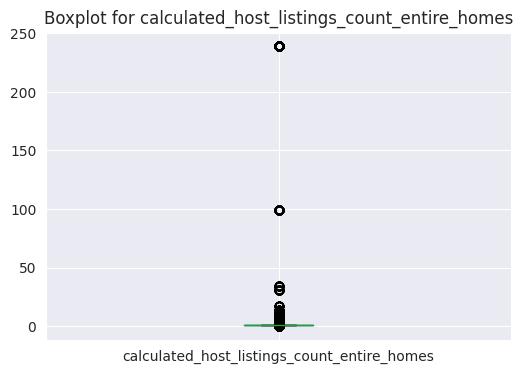

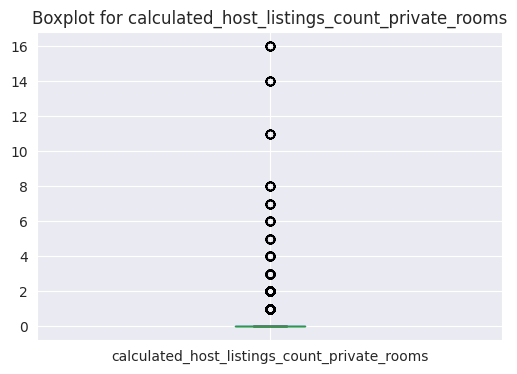

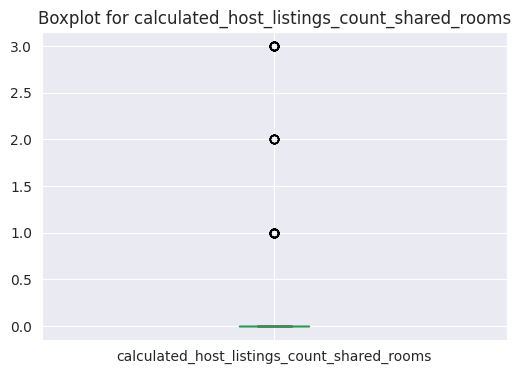

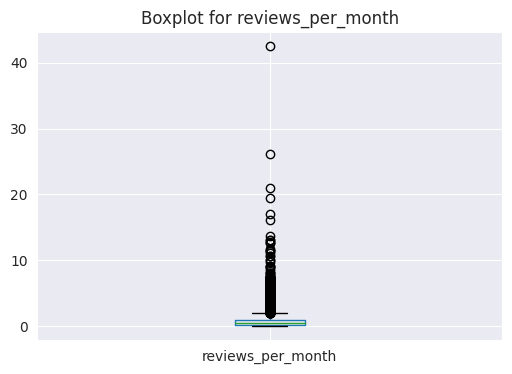

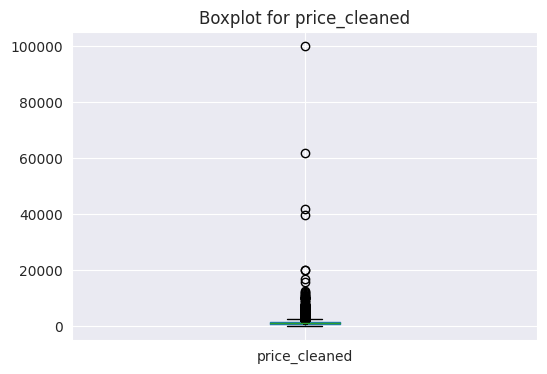

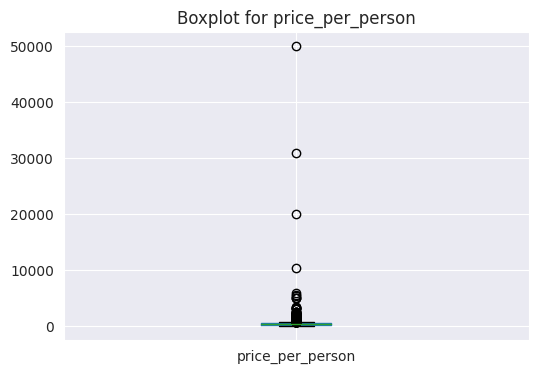

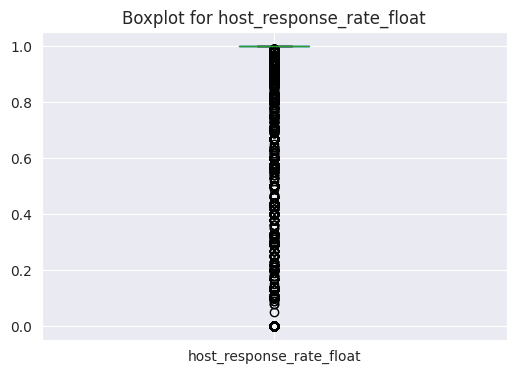

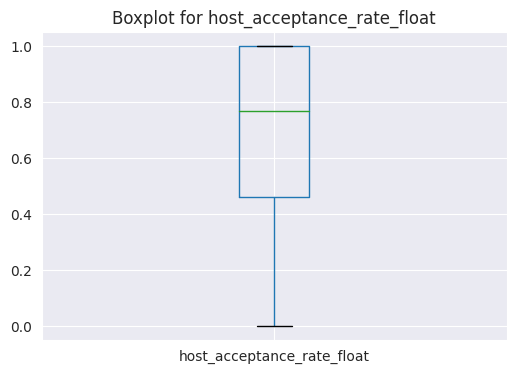

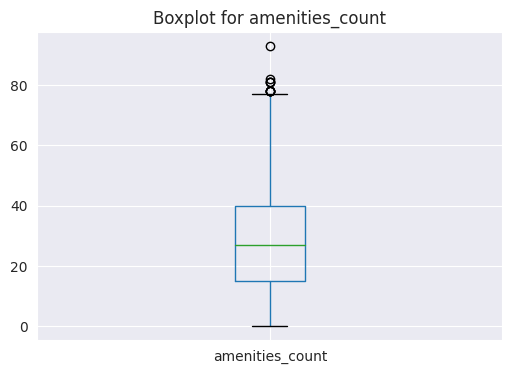

In [42]:
import matplotlib.pyplot as plt

def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        df.boxplot(column=[col])
        plt.title(f"Boxplot for {col}")
        plt.show()

plot_boxplots(listings_df)

### Features of listings

In [43]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20909 non-null  int64  
 1   listing_url                                   20909 non-null  object 
 2   scrape_id                                     20909 non-null  int64  
 3   last_scraped                                  20909 non-null  object 
 4   source                                        20909 non-null  object 
 5   name                                          20909 non-null  object 
 6   description                                   20235 non-null  object 
 7   host_id                                       20909 non-null  int64  
 8   host_name                                     20908 non-null  object 
 9   host_since                                    20908 non-null 

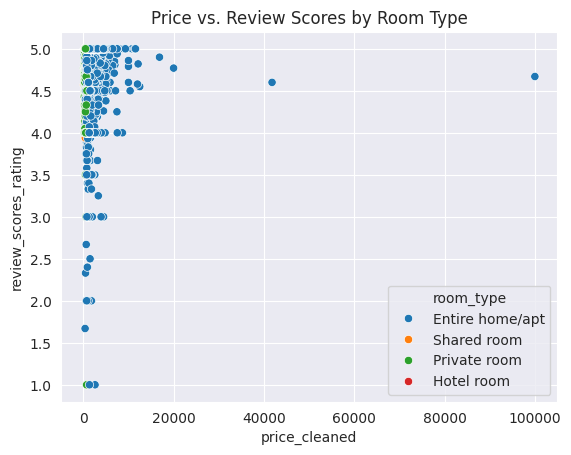

In [44]:
sns.scatterplot(x='price_cleaned', y='review_scores_rating', hue='room_type', data=listings_df)
plt.title('Price vs. Review Scores by Room Type')
plt.show()


In [45]:
# Convert 'host_is_superhost' to binary (1 for 't', 0 for 'f')
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t': 1, 'f': 0})

In [46]:
# Select all numerical columns
numerical_columns = listings_df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numerical_columns.corr()['number_of_reviews']
print(correlation_matrix.sort_values(ascending=False))

number_of_reviews                               1.000000
number_of_reviews_ltm                           0.740198
reviews_per_month                               0.521263
number_of_reviews_l30d                          0.401874
host_is_superhost                               0.283675
host_acceptance_rate_float                      0.179460
minimum_maximum_nights                          0.168702
maximum_nights_avg_ntm                          0.167102
maximum_maximum_nights                          0.163471
calculated_host_listings_count_shared_rooms     0.102592
calculated_host_listings_count_private_rooms    0.101819
maximum_nights                                  0.101754
host_response_rate_float                        0.098778
amenities_count                                 0.094985
availability_365                                0.085344
beds                                            0.085198
longitude                                       0.055658
availability_90                

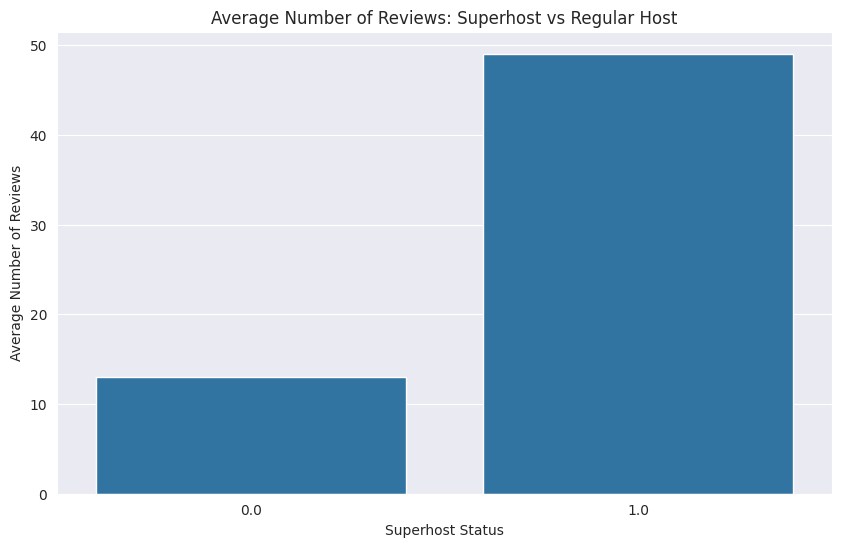

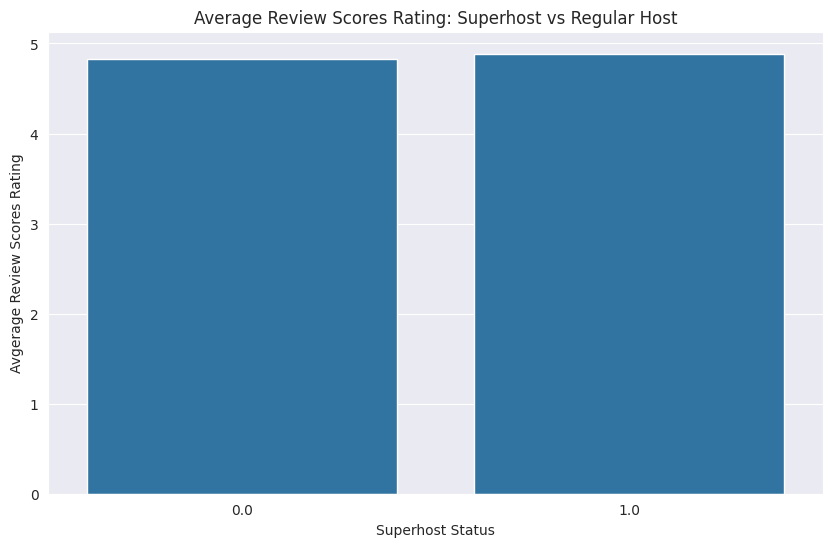

In [47]:
# Superhost vs Regular Host Analysis
superhost_data = listings_df.groupby('host_is_superhost')[['number_of_reviews', 'review_scores_rating']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=superhost_data, x='host_is_superhost', y='number_of_reviews')
plt.title('Average Number of Reviews: Superhost vs Regular Host')
plt.xlabel('Superhost Status')
plt.ylabel('Average Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=superhost_data, x='host_is_superhost', y='review_scores_rating')
plt.title('Average Review Scores Rating: Superhost vs Regular Host')
plt.xlabel('Superhost Status')
plt.ylabel('Avgerage Review Scores Rating')
plt.show()

In [48]:
# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()['host_is_superhost']

# Display results
print(correlation_matrix.sort_values(ascending=False))




host_is_superhost                               1.000000
number_of_reviews_ltm                           0.316145
number_of_reviews                               0.283675
number_of_reviews_l30d                          0.243849
host_acceptance_rate_float                      0.210605
reviews_per_month                               0.195790
host_response_rate_float                        0.152580
amenities_count                                 0.144349
review_scores_cleanliness                       0.092866
calculated_host_listings_count_private_rooms    0.091543
review_scores_rating                            0.083103
minimum_maximum_nights                          0.082984
maximum_nights_avg_ntm                          0.078840
maximum_maximum_nights                          0.071948
review_scores_accuracy                          0.069250
review_scores_value                             0.066466
review_scores_communication                     0.063853
review_scores_checkin          

In [49]:
# Select relevant categorical columns
selected_categorical = [
    'host_response_time',
    'host_identity_verified',
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'instant_bookable'
]

# One-hot encode selected categorical columns
encoded_df = pd.get_dummies(listings_df[selected_categorical], drop_first=True)

# Combine with 'host_is_superhost' for correlation
encoded_df['host_is_superhost'] = listings_df['host_is_superhost']

# Calculate correlation
correlation_matrix = encoded_df.corr()['host_is_superhost'].sort_values(ascending=False)

# Display results

print(correlation_matrix)



host_is_superhost                      1.000000
host_response_time_within an hour      0.201038
room_type_Private room                 0.137140
host_identity_verified_t               0.085295
property_type_Private room in condo    0.083743
                                         ...   
neighbourhood_cleansed_Østerbro       -0.028649
property_type_Entire home             -0.041700
host_response_time_within a day       -0.058056
property_type_Entire rental unit      -0.097072
property_type_Minsu                         NaN
Name: host_is_superhost, Length: 78, dtype: float64


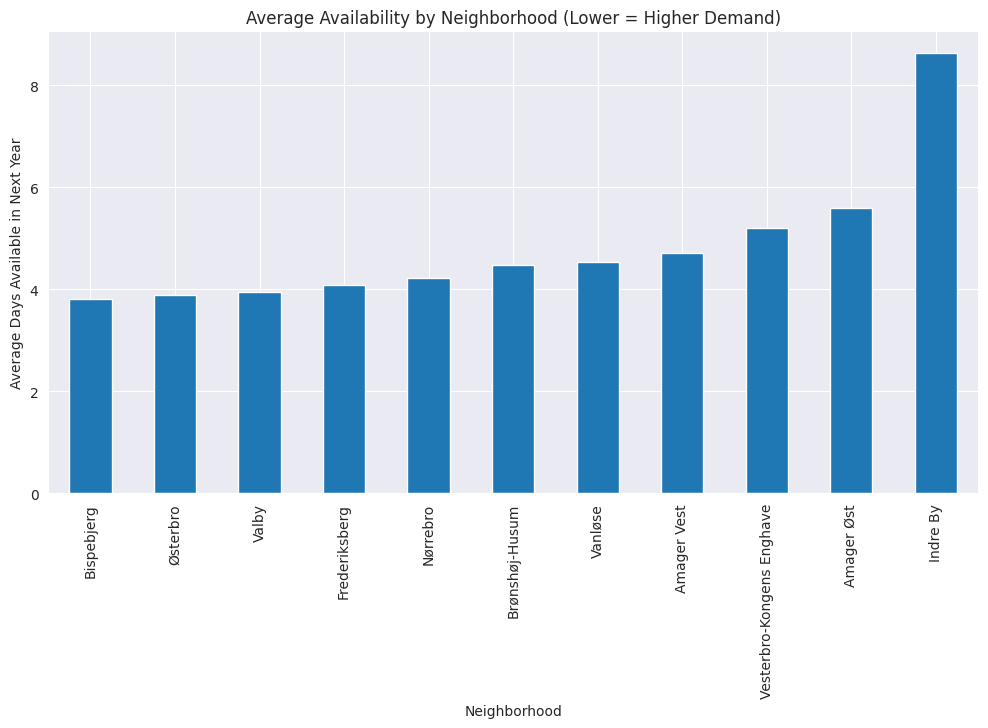

In [50]:
# High-Demand Neighborhoods
demand_by_neighborhood = listings_df.groupby('neighbourhood_cleansed')['number_of_reviews_ltm'].mean().sort_values()
plt.figure(figsize=(12, 6))
demand_by_neighborhood.plot(kind='bar')
plt.title('Average Availability by Neighborhood (Lower = Higher Demand)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Days Available in Next Year')
plt.xticks(rotation=90)
plt.show()

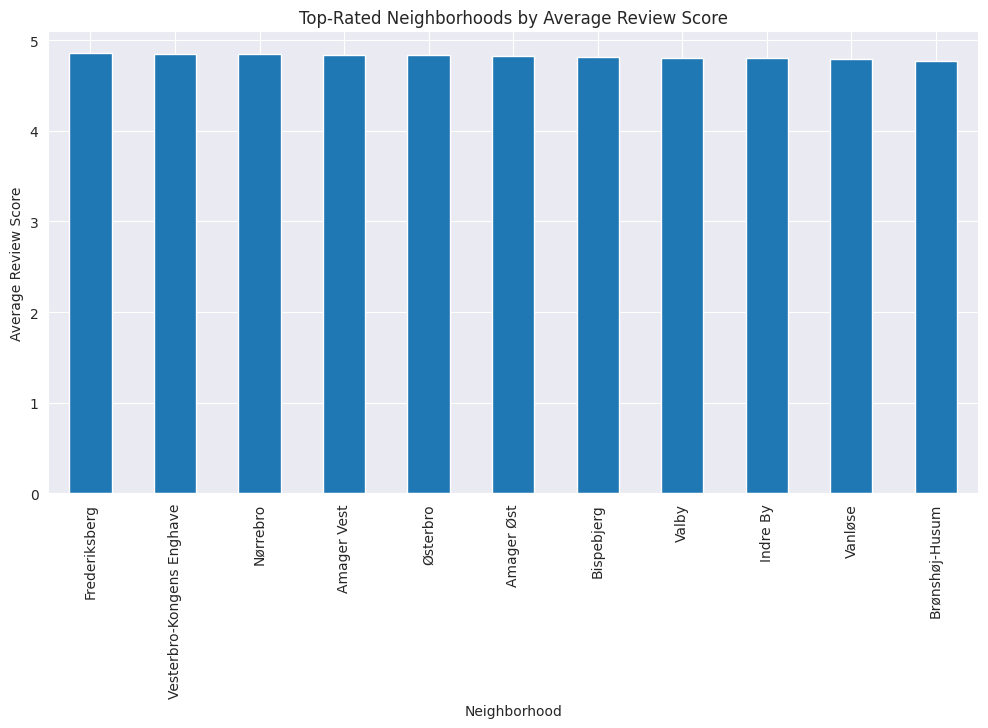

In [51]:
# Top-Rated Areas
top_rated_neighborhoods = listings_df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_rated_neighborhoods.plot(kind='bar')
plt.title('Top-Rated Neighborhoods by Average Review Score')
plt.xlabel('Neighborhood')
plt.ylabel('Average Review Score')
plt.xticks(rotation=90)
plt.show()

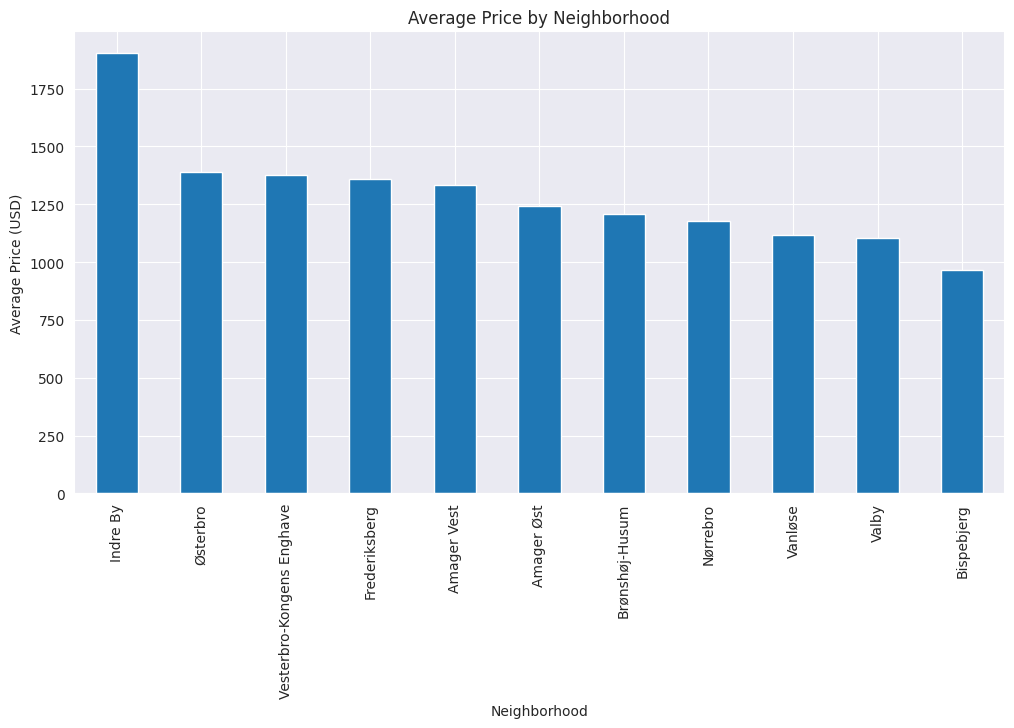

In [52]:
# Price Variation by Neighborhood
price_by_neighborhood = listings_df.groupby('neighbourhood_cleansed')['price_cleaned'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
price_by_neighborhood.plot(kind='bar')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()

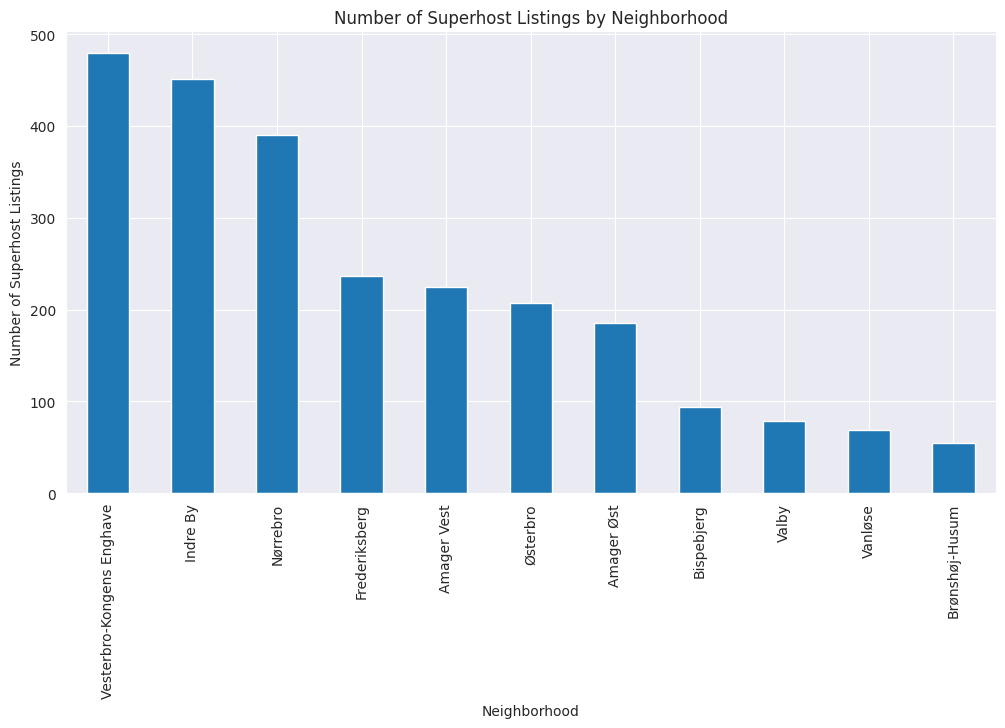

In [53]:
# Superhost Clusters
superhost_neighborhoods = listings_df[listings_df['host_is_superhost'] == 1].groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
superhost_neighborhoods.plot(kind='bar')
plt.title('Number of Superhost Listings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Superhost Listings')
plt.xticks(rotation=90)
plt.show()

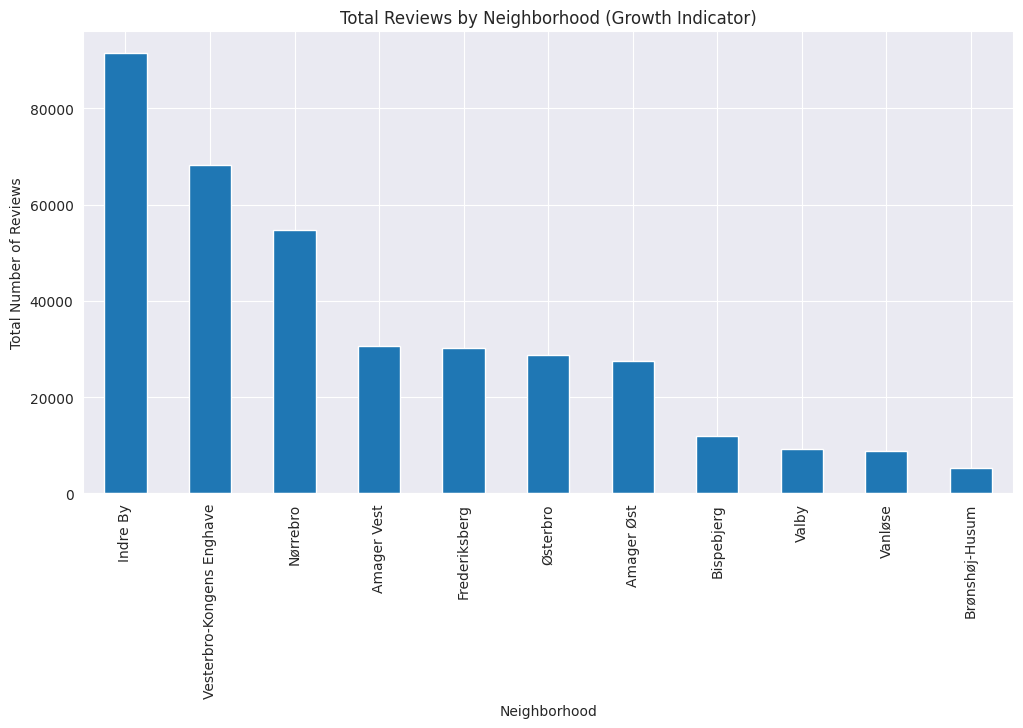

In [54]:
# Growth Potential
growth_neighborhoods = listings_df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
growth_neighborhoods.plot(kind='bar')
plt.title('Total Reviews by Neighborhood (Growth Indicator)')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.show()

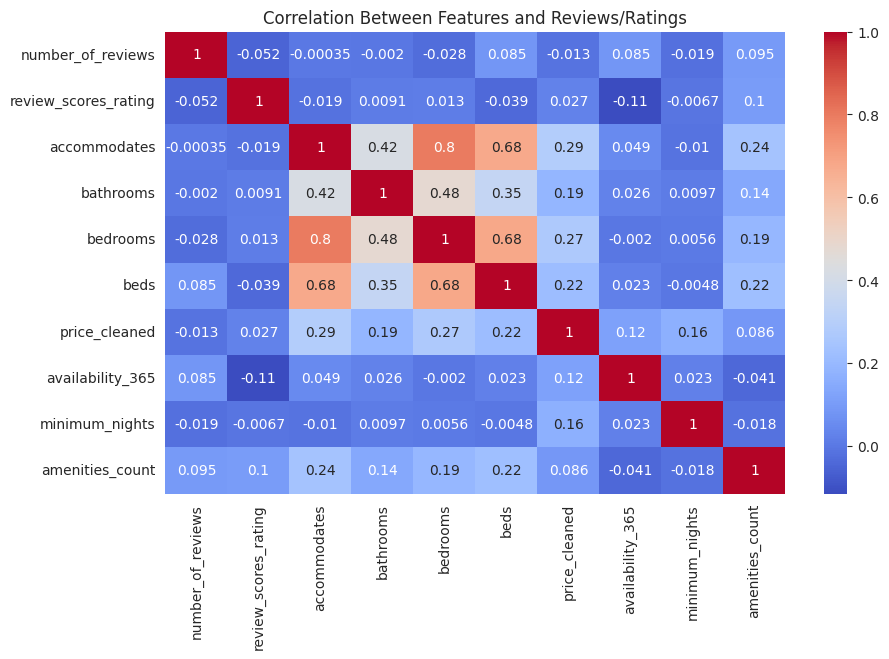

In [55]:
correlation_features = ['number_of_reviews', 'review_scores_rating', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_cleaned', 'availability_365', 'minimum_nights', 'amenities_count']
correlation_matrix = listings_df[correlation_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features and Reviews/Ratings')
plt.show()

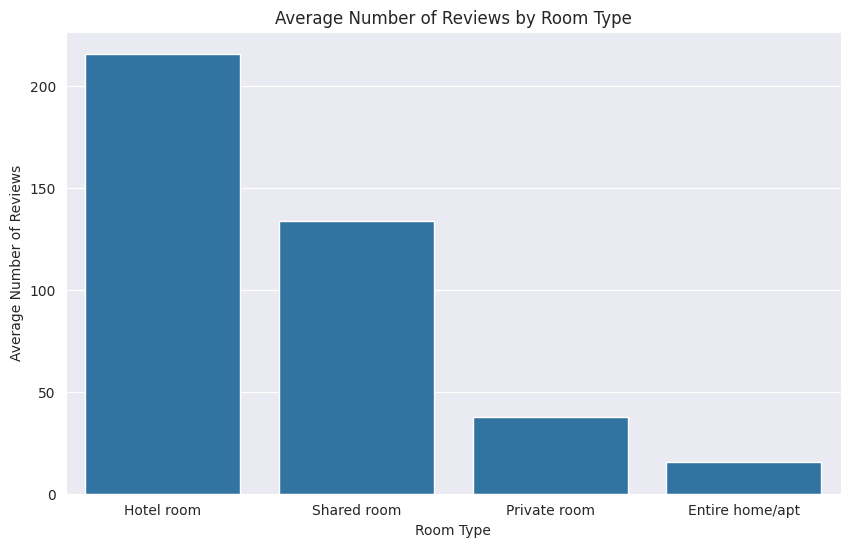

In [56]:
room_type_reviews = listings_df.groupby('room_type')['number_of_reviews'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_reviews.index, y=room_type_reviews.values)
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()

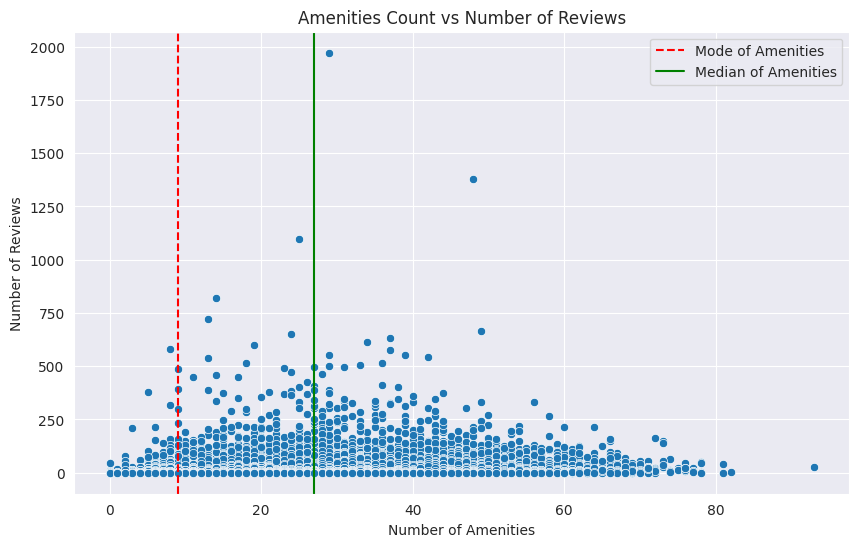

In [57]:
# Analyze Impact of Amenities Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amenities_count', y='number_of_reviews', data=listings_df)
plt.title('Amenities Count vs Number of Reviews')
plt.xlabel('Number of Amenities')
plt.ylabel('Number of Reviews')
plt.axvline(listings_df['amenities_count'].mode()[0], color='r', linestyle='--', label='Mode of Amenities')
plt.axvline(listings_df['amenities_count'].median(), color='g', linestyle='-', label='Median of Amenities')
plt.legend()
plt.show()

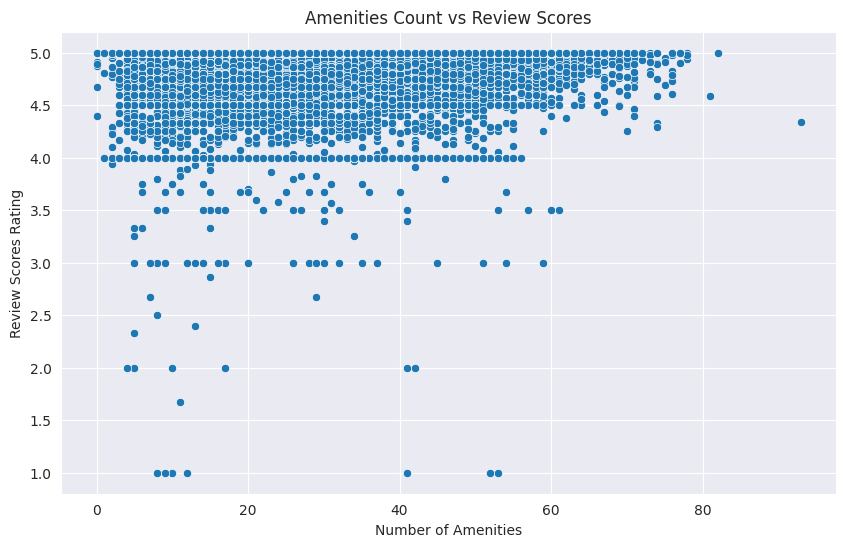

In [58]:
# Review Scores vs Amenities Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amenities_count', y='review_scores_rating', data=listings_df)
plt.title('Amenities Count vs Review Scores')
plt.xlabel('Number of Amenities')
plt.ylabel('Review Scores Rating')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d371c8d-7252-468c-b3de-061a28e004b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>